In [1]:
%matplotlib inline 
%load_ext autoreload
%autoreload 2

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as write_image
from glob import glob
import scipy.stats as stats

# Add working directory here

In [2]:
from sheepfat import post_process

# Add data here

In [3]:
import sys
sys.path.append('./data/')
print(sys.path[-1])

./data/


# (0) Select data:
## (0.0) Select a orignal-label-prediction samples

In [8]:
# original tissue
all_files_original = glob('./data/images/KW/H&E/inputs/*.tif') # KW - big images
#all_files_original = glob('./data/images/DA/H&E/inputs/*.tif') # DA - big images
#all_files_original = glob('./data/images/KW/H&E/subwindows_512x512/original/*.tif') # KW - patches

#print(*[x.split('/')[-1] for x in np.sort(all_files_original)], sep='\n')  
len(all_files_original)

17

In [11]:
# annotation
all_files_annotation = glob('./data/images/KW/H&E/masks/*.png') # KW - big images
#all_files_annotation = glob('./data/images/DA/H&E/masks/*.png') # DA - big images
# all_files_annotation = glob('./data/images/KW/H&E/subwindows_512x512/labels/*.png') # KW - patches

#print(*[x.split('/')[-1] for x in np.sort(all_files_annotation)], sep='\n')
len(all_files_annotation)

17

In [8]:
model_id = "0"

In [272]:
# prediciton
#all_files_prediction = glob('./data/prediction/cross-validation/images_KW/v2/binary_POI/*.*') # KW - big images
#all_files_prediction = glob('./data/prediction/cross-validation/images_mixed/DA_best-model/binary_prediction/*.*') # mixed-DA - big images
#all_files_prediction = glob('./data/prediction/cross-validation/images_DA/v2/binary_POI/*.*') # DA - big images
#all_files_prediction = glob('./data/prediction/cross-validation/images_KW/v2/binary_POI_patches_noFat/*.*') # KW - patches
#all_files_prediction = glob('./data/prediction/cellpose/whole_sample/original_binary/*.*') # cellpose - big images
#all_files_prediction = glob('./data/prediction/cellpose/cut-outs_binary/*.*') # cellpose - patches
#all_files_prediction = glob('./data/prediction/LAB_kmeans/C=4/binary/*.*') # LAB - C=4
#all_files_prediction = glob('./data/prediction/LAB_kmeans/C=3/binary_subwindows/*.*') # LAB - C=3
#all_files_prediction = glob('./data/prediction/ilastik/binary_whole-sample/*.*') # ilastik - big images
#all_files_prediction = glob('./data/prediction/ilastik/binary_patches/*.*') # ilastik - patches
#all_files_prediction = glob('./data/prediction/SegNet_model-all/training/whole-samples/binary/*.*') # KW - big images - final model
all_files_prediction = glob('./data/prediction/SegNet_model-all/training/patches/binary/*.*') # KW - patches - final model

#print(*[x.split('/')[-1] for x in np.sort(all_files_prediction)], sep='\n')
len(all_files_prediction)

12

In [273]:
abbrevation = 'S34.3'

orig_path = [x for x in all_files_original if abbrevation in x][0]
true_path = [x for x in all_files_annotation if abbrevation in x][0]
pred_path = [x for x in all_files_prediction if abbrevation in x][0]

print('orig_path:\t', orig_path.split('/')[-2:])
print('true_path:\t', true_path.split('/')[-2:])
print('pred_path:\t', pred_path.split('/')[-2:])

orig_path:	 ['inputs', 'S34.3_DC07_H&E_10x_s3.tif']
true_path:	 ['masks', 'S34.3_DC07_H&E_10x_s3.png']
pred_path:	 ['binary', 'S34.3_DC07_H&E_10x_s3.png']


## (0.1) Define the directory where the results will be stored in 

In [ ]:
#path_quantitative_results_performance = './data/prediction/cross-validation/images_KW/v2/'
#path_quantitative_results_performance = './data/prediction/cross-validation/images_DA/v2/quantitative_results_performance_POI/'
#path_quantitative_results_performance = './data/prediction/cross-validation/images_KW/v2/quantitative_results_performance_POI_noFat/'
#path_quantitative_results_performance = './data/prediction/cellpose/'
#path_quantitative_results_performance = './data/prediction/LAB_kmeans/C=3/'
#path_quantitative_results_performance = './data/prediction/ilastik/'
#path_quantitative_results_performance = './data/prediction/SegNet_model-all/training/'

path_quantitative_results_performance = f'./data/prediction/{model_id}/'

path_metric_evaluation = os.path.join(path_quantitative_results_performance, 'Metric_evaluation.csv')                                      
path_metric_evaluation

# (1) Evaluate samples:
## (1.0) Evaluate a single sample

In [275]:
#%%time

#df_single = post_process.perform_single_evaluation(true_path, pred_path, verbose=1)

## (1.1) Evaluate all pre-selected samples

In [ ]:
%%time

print('path_quantitative_results_performance:', path_quantitative_results_performance)

df_all_scores = post_process.perform_multiple_evaluation(all_files_annotation, all_files_prediction, path_quantitative_results_performance)

df_all_scores

In [277]:
#df_scores = pd.read_csv(path_metric_evaluation, index_col=0)
df_scores = df_all_scores.copy()
df_scores = df_scores.reset_index(drop=True)#.set_index("sample")
df_scores

sample  Accuracy  Precision    Recall       F-1  \
0         S34.3_DC07_H&E_10x_s3  0.981261   0.236673  0.889050  0.373830   
1         S37.3_SHAM_H&E_10x_s2  0.991152   0.718991  0.862718  0.784324   
2            S50.4_SHAM_H&E_10x  0.978704   0.867808  0.902233  0.884686   
3    JTS04.3_PCAControl_H&E_10x  0.995722   0.637389  0.892905  0.743815   
4          S53.1_2_SHAM_H&E_10x  0.988380   0.770986  0.949141  0.850837   
5         S46.3_SHAM_H&E_10x_s2  0.995224   0.630933  0.955333  0.759962   
6   S43.4_H&E-Bild-Export-11_s2  0.990461   0.363765  0.879289  0.514627   
7      S41.1_Control_H&E_10x_s2  0.986758   0.796607  0.874176  0.833591   
8            S47.4_SHAM_H&E_10x  0.992283   0.458231  0.742720  0.566780   
9         S35.4_SHAM_H&E_10x_s3  0.990108   0.895528  0.930335  0.912600   
10        S42.4_DC04_H&E_10x_s4  0.983942   0.609799  0.890861  0.724010   
11           S51.1_SHAM_H&E_10x  0.993277   0.911530  0.936545  0.923868   

   TruePositive FalsePositive FalseNegative TrueNegative  
0        738884       2383075         92210    128881327  
1       1951046        762543        310464    118249522  
2      10657714       1623473       1154883    117029631  
3        271436        154420         32556     43251588  
4        971792        288662         52073     28011313  
5        776653        454307         36313    101457071  
6        998114       1745731        137023    194500739  
7       5788836       1478027        833215    166444358  
8        611531        723017        211836    119591472  
9      11972978       1396765        896561    217564576  
10      2358876       1509410        288984    107835974  
11      7083785        687529        479958    165406914

In [278]:
eps = 0.0001

# calculate the matthew correlation coefficient
df_scores['PPV'] = df_scores['TruePositive'] / (df_scores['TruePositive'] + df_scores['FalsePositive']+eps)
df_scores['TPR'] = df_scores['TruePositive'] / (df_scores['TruePositive'] + df_scores['FalseNegative']+eps)
df_scores['TNR'] = df_scores['TrueNegative'] / (df_scores['TrueNegative'] + df_scores['FalsePositive']+eps)
df_scores['NPV'] = df_scores['TrueNegative'] / (df_scores['TrueNegative'] + df_scores['FalseNegative']+eps)

df_scores['FDR'] = 1 - df_scores['PPV']
df_scores['FNR'] = 1 - df_scores['TPR']
df_scores['FPR'] = 1 - df_scores['TNR']
df_scores['FOR'] = 1 - df_scores['NPV']

# df_scores['MCC'] = np.sqrt(df_scores['PPV']*df_scores['TPR']*df_scores['TNR']*df_scores['NPV']) - np.sqrt(df_scores['FDR']*df_scores['FNR']*df_scores['FPR']*df_scores['FOR'])

#df_scores.to_csv(os.path.join(path_quantitative_results_performance, 'Metric_evaluation_enhanced.csv'))

df_scores = df_scores.set_index('sample')
df_scores['sample'] = df_scores.index

df_scores

Accuracy  Precision    Recall       F-1  \
sample                                                                 
S34.3_DC07_H&E_10x_s3        0.981261   0.236673  0.889050  0.373830   
S37.3_SHAM_H&E_10x_s2        0.991152   0.718991  0.862718  0.784324   
S50.4_SHAM_H&E_10x           0.978704   0.867808  0.902233  0.884686   
JTS04.3_PCAControl_H&E_10x   0.995722   0.637389  0.892905  0.743815   
S53.1_2_SHAM_H&E_10x         0.988380   0.770986  0.949141  0.850837   
S46.3_SHAM_H&E_10x_s2        0.995224   0.630933  0.955333  0.759962   
S43.4_H&E-Bild-Export-11_s2  0.990461   0.363765  0.879289  0.514627   
S41.1_Control_H&E_10x_s2     0.986758   0.796607  0.874176  0.833591   
S47.4_SHAM_H&E_10x           0.992283   0.458231  0.742720  0.566780   
S35.4_SHAM_H&E_10x_s3        0.990108   0.895528  0.930335  0.912600   
S42.4_DC04_H&E_10x_s4        0.983942   0.609799  0.890861  0.724010   
S51.1_SHAM_H&E_10x           0.993277   0.911530  0.936545  0.923868   

                            TruePositive FalsePositive FalseNegative  \
sample                                                                 
S34.3_DC07_H&E_10x_s3             738884       2383075         92210   
S37.3_SHAM_H&E_10x_s2            1951046        762543        310464   
S50.4_SHAM_H&E_10x              10657714       1623473       1154883   
JTS04.3_PCAControl_H&E_10x        271436        154420         32556   
S53.1_2_SHAM_H&E_10x              971792        288662         52073   
S46.3_SHAM_H&E_10x_s2             776653        454307         36313   
S43.4_H&E-Bild-Export-11_s2       998114       1745731        137023   
S41.1_Control_H&E_10x_s2         5788836       1478027        833215   
S47.4_SHAM_H&E_10x                611531        723017        211836   
S35.4_SHAM_H&E_10x_s3           11972978       1396765        896561   
S42.4_DC04_H&E_10x_s4            2358876       1509410        288984   
S51.1_SHAM_H&E_10x               7083785        687529        479958   

                            TrueNegative       PPV       TPR       TNR  \
sample                                                                   
S34.3_DC07_H&E_10x_s3          128881327  0.236673   0.88905  0.981845   
S37.3_SHAM_H&E_10x_s2          118249522  0.718991  0.862718  0.993593   
S50.4_SHAM_H&E_10x             117029631  0.867808  0.902233  0.986317   
JTS04.3_PCAControl_H&E_10x      43251588  0.637389  0.892905  0.996442   
S53.1_2_SHAM_H&E_10x            28011313  0.770986  0.949141    0.9898   
S46.3_SHAM_H&E_10x_s2          101457071  0.630933  0.955333  0.995542   
S43.4_H&E-Bild-Export-11_s2    194500739  0.363765  0.879289  0.991104   
S41.1_Control_H&E_10x_s2       166444358  0.796607  0.874176  0.991198   
S47.4_SHAM_H&E_10x             119591472  0.458231   0.74272  0.993991   
S35.4_SHAM_H&E_10x_s3          217564576  0.895528  0.930335  0.993621   
S42.4_DC04_H&E_10x_s4          107835974  0.609799  0.890861  0.986196   
S51.1_SHAM_H&E_10x             165406914   0.91153  0.936545  0.995861   

                                  NPV        FDR        FNR         FPR  \
sample                                                                    
S34.3_DC07_H&E_10x_s3        0.999285   0.763327    0.11095   0.0181548   
S37.3_SHAM_H&E_10x_s2        0.997381   0.281009   0.137282  0.00640727   
S50.4_SHAM_H&E_10x           0.990228   0.132192  0.0977671   0.0136825   
JTS04.3_PCAControl_H&E_10x   0.999248   0.362611   0.107095  0.00355757   
S53.1_2_SHAM_H&E_10x         0.998144   0.229014  0.0508592   0.0102001   
S46.3_SHAM_H&E_10x_s2        0.999642   0.369067  0.0446673  0.00445786   
S43.4_H&E-Bild-Export-11_s2  0.999296   0.636235   0.120711   0.0088956   
S41.1_Control_H&E_10x_s2     0.995019   0.203393   0.125824  0.00880185   
S47.4_SHAM_H&E_10x           0.998232   0.541769    0.25728  0.00600939   
S35.4_SHAM_H&E_10x_s3        0.995896   0.104472  0.0696654  0.00637905   
S42.4_DC04_H&E_10x_s4        0.997327   0.390201   0.109139   0.0138041   

# (2) Plot evaluation results:

## (2.0) Plot the samples-wise performance

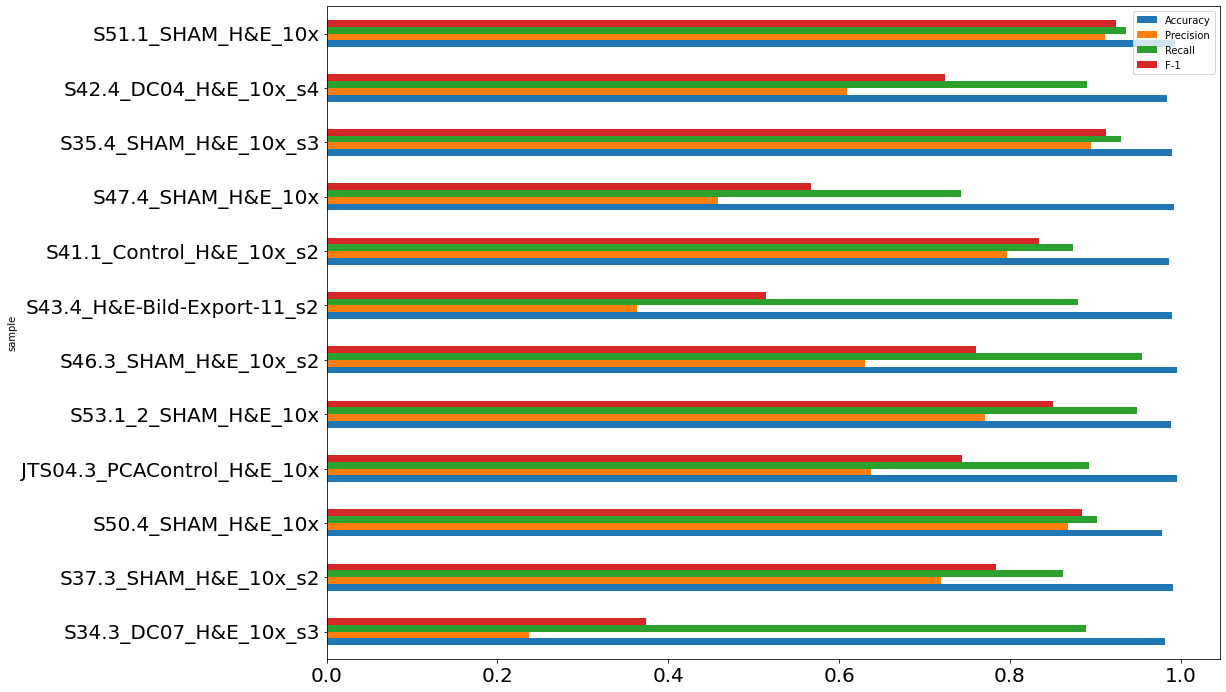

In [280]:
# cross-validation
#ax = df_scores[['Accuracy', 'Precision', 'Recall', 'F-1', 'MCC']].plot.barh(fontsize=20, figsize=(16,12))

ax = df_scores[['Accuracy', 'Precision', 'Recall', 'F-1']].plot.barh(fontsize=20, figsize=(16,12))
#plt.legend(prop={'size': 15})
plt.savefig(os.path.join(path_quantitative_results_performance, 'Samples-metric.png'), dpi=300)

plt.show()

## (2.1) Plot the model-wise performance

In [281]:
tmp_boxplot = df_scores.copy()
tmp_boxplot['sample'] = df_scores.index
df_boxplot = pd.melt(tmp_boxplot, id_vars=['sample'], value_vars=['Accuracy', 'Precision', 'Recall', 'F-1'])

df_boxplot.head(10)

sample  variable     value
0        S34.3_DC07_H&E_10x_s3  Accuracy  0.981261
1        S37.3_SHAM_H&E_10x_s2  Accuracy  0.991152
2           S50.4_SHAM_H&E_10x  Accuracy  0.978704
3   JTS04.3_PCAControl_H&E_10x  Accuracy  0.995722
4         S53.1_2_SHAM_H&E_10x  Accuracy  0.988380
5        S46.3_SHAM_H&E_10x_s2  Accuracy  0.995224
6  S43.4_H&E-Bild-Export-11_s2  Accuracy  0.990461
7     S41.1_Control_H&E_10x_s2  Accuracy  0.986758
8           S47.4_SHAM_H&E_10x  Accuracy  0.992283
9        S35.4_SHAM_H&E_10x_s3  Accuracy  0.990108

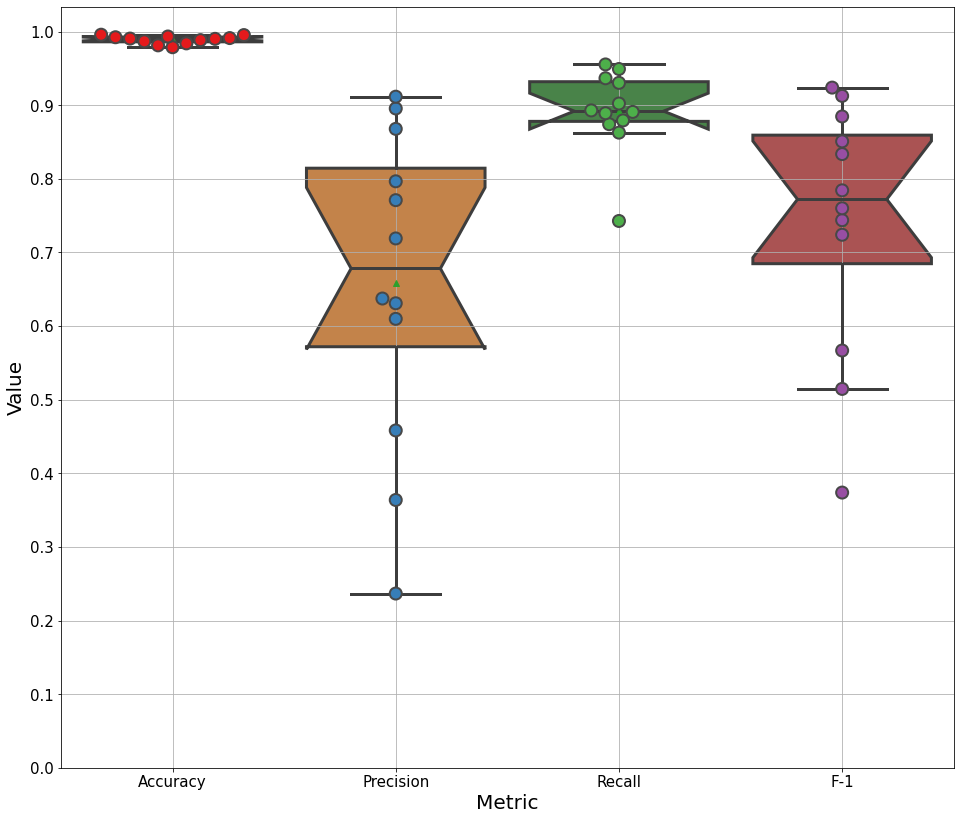

In [282]:
plt.figure(figsize=(16,14))
ax = sns.boxplot(x='variable',y='value', data=df_boxplot, saturation=0.5, notch=True, linewidth=3, showmeans=True)
ax = sns.swarmplot(x='variable',y='value', data=df_boxplot, size=12, alpha=1, dodge=True, palette=sns.color_palette("Set1"), edgecolor='gray', linewidth=2) 

ax.set_xlabel("Metric",fontsize=20)
ax.set_ylabel("Value",fontsize=20)
ax.set_yticks(np.arange(start=0, stop=1.1, step=0.1))
ax.tick_params(labelsize=15)
plt.grid(True)

plt.savefig(os.path.join(path_quantitative_results_performance, 'Metric-evaluation.png'), dpi=300) #'Metric-evaluation_KW-vs-ilastik_whole-samples.png'), dpi=300)
plt.show()

## (2.2) Compare methods with regard to [F-1, Precision, Recall]-metrics and their correlations of fat fraction next to each other

In [9]:
paths_to_methods= [
    "./data/quantification/metric-evaluation/KW-vs-LAB_kmeans_C=3/whole-samples/Metric-evaluation_KW-vs-LABkmeans_C-3_whole-samples.csv", # kmeans=3
    "./data/quantification/metric-evaluation/KW-vs-ilastik/whole-samples/Metric-evaluation_KW-vs-ilastik_whole-samples.csv", # ilastik
    "./data/quantification/metric-evaluation/KW-vs-cellpose/whole-samples/Metric-evaluation_KW-vs-cellpose_whole-samples.csv", # cellpose
    "./data/quantification/metric-evaluation/KW-vs-SegNet_crossValidation/whole-samples/Metric-evaluation_KW-vs-SegNet_whole-samples.csv", # SegNet-CV
    "./data/quantification/metric-evaluation/KW-vs-SegNet_model-all/whole-samples/Metric-evaluation_KW-vs-SegNet_model-all_whole-samples.csv", # SegNet-retrained
]

path_to_fractions = [
    "./data/quantification/fat/training_data/KW-vs-LAB_kmeans_C=3/fat_fraction.csv", # kmeans=3
    "./data/quantification/fat/training_data/KW-vs-ilastik/fat_fraction.csv", # ilastik
    "./data/quantification/fat/training_data/KW-vs-cellpose/fat_fraction.csv", # cellpose
    "./data/quantification/fat/training_data/KW-vs-SegNet_crossValidation/fat_fraction.csv", # SegNet-CV
    "./data/quantification/fat/training_data/KW-vs-SegNet_model-all/fat_fraction.csv", # SegNet-retrained
]

path_to_hausdorffs = [
    "./data/quantification/metric-evaluation/KW-vs-LAB_kmeans_C=3/hausdorff_distance.csv", # kmeans=3
    "./data/quantification/metric-evaluation/KW-vs-ilastik/hausdorff_distance.csv", # ilastik
    "./data/quantification/metric-evaluation/KW-vs-cellpose/hausdorff_distance.csv", # cellpose
    "./data/quantification/metric-evaluation/KW-vs-SegNet_crossValidation/hausdorff_distance.csv", # SegNet-CV
    "./data/quantification/metric-evaluation/KW-vs-SegNet_model-all/hausdorff_distance.csv", # SegNet-retrained
]

methods = [
    "k-means", # 3 clusters
    "ilastik",
    "cellpose",
    "SegNet cross-validation",
    "SegNet retrained", # PCA+Femur
]

print(len(paths_to_methods), len(path_to_fractions), len(methods), len(path_to_hausdorffs))

5 5 5 5


In [11]:
df_methods = pd.DataFrame()

for path_to_methods, method in zip(paths_to_methods, methods):
    
    #df_methods = pd.concat([df_methods, pd.read_csv(path_to_methods).assign(Method=str(method)).rename(columns={"F-1": "Dice coefficient"})])
    df_methods = pd.concat([df_methods, pd.read_csv(path_to_methods).assign(Method=str(method))])
    
df_methods.to_csv(os.path.join("./data/quantification/metric-evaluation/", f"Pixel-wise-overlap_comparison.csv")) 
      
df_methods

Unnamed: 0                 sample  Accuracy  Precision    Recall  \
0          0.0                GTS01.4  0.901641   0.060657  0.540745   
1          1.0                JTS01.3  0.963495   0.363541  0.895907   
2          2.0                GTS01.1  0.965849   0.134422  0.699865   
3          3.0                  S34.3  0.952409   0.089170  0.712369   
4          4.0                  S37.3  0.964234   0.265390  0.519190   
..         ...                    ...       ...        ...       ...   
12        12.0  S35.4_SHAM_H&E_10x_s3  0.992350   0.904171  0.964407   
13        13.0  S42.4_DC04_H&E_10x_s4  0.985193   0.629768  0.906875   
14        14.0     UTS02.1_OP_H&E_10x  0.999237   0.638948  0.827580   
15        15.0     UTS01.4_OP_H&E_10x  0.997349   0.231281  0.772368   
16        16.0     S51.1_SHAM_H&E_10x  0.994355   0.922477  0.950263   

         F-1  TruePositive  FalsePositive  FalseNegative  TrueNegative  \
0   0.109078       1091801       16907850         927268     162400569   
1   0.517209       5065141        8867637         588508     244518976   
2   0.225528       1074889        6921472         460964     207710303   
3   0.158499        592046        6047496         239048     125216906   
4   0.351240       1174154        3250109        1087356     115761956   
..       ...           ...            ...            ...           ...   
12  0.933318      12411476        1315441         458063     217645900   
13  0.743336       2401279        1411680         246581     107933704   
14  0.721132         81078          45815          16892      82083645   
15  0.355969        125852         418301          37091     171219910   
16  0.936163       7187543         604030         376200     165490413   

              Method  model_id  
0            k-means       NaN  
1            k-means       NaN  
2            k-means       NaN  
3            k-means       NaN  
4            k-means       NaN  
..               ...       ...  
12  SegNet retrained       NaN  
13  SegNet retrained       NaN  
14  SegNet retrained       NaN  
15  SegNet retrained       NaN  
16  SegNet retrained       NaN  

[85 rows x 12 columns]

In [10]:
max_distance = 724.077

df_hausdorffs = pd.DataFrame()

for path_to_hausdorff, method in zip(path_to_hausdorffs, methods):
    
    df_tmp = (pd
        .read_csv(path_to_hausdorff, index_col=0)
        .assign(Method=str(method))
        .assign(Hausdorffdistance=lambda df_: df_["hausdorff_distance"] / max_distance)
        .drop(['path_label', 'sample', 'hausdorff_distance'], axis=1)
        .rename(columns={"Hausdorffdistance": "Hausdorff distance", "sample_code": "sample"})
    )
              
    df_hausdorffs = pd.concat([df_hausdorffs, df_tmp])
    
# df_hausdorffs.to_csv(os.path.join("./data/quantification/metric-evaluation/", f"Hausdorff-distance_comparison.csv")) 
    
df_hausdorffs

sample            Method  Hausdorff distance
0    GTS01.1           k-means            0.227855
1    GTS01.1           k-means            0.658119
2    GTS01.1           k-means            0.520784
3    GTS01.1           k-means            0.374557
4    GTS01.1           k-means            0.448308
..       ...               ...                 ...
992    S46.3  SegNet retrained            0.024898
993    S46.3  SegNet retrained            0.012733
994    S46.3  SegNet retrained            0.019531
995    S46.3  SegNet retrained            0.044822
996    S46.3  SegNet retrained            0.214714

[5073 rows x 3 columns]

In [7]:
df_hausdorffs_vis = pd.melt(df_hausdorffs, id_vars=['sample', 'Method'], value_vars=['Hausdorff distance'])
df_hausdorffs_vis

sample            Method            variable     value
0     GTS01.1           k-means  Hausdorff distance  0.227855
1     GTS01.1           k-means  Hausdorff distance  0.658119
2     GTS01.1           k-means  Hausdorff distance  0.520784
3     GTS01.1           k-means  Hausdorff distance  0.374557
4     GTS01.1           k-means  Hausdorff distance  0.448308
...       ...               ...                 ...       ...
5068    S46.3  SegNet retrained  Hausdorff distance  0.024898
5069    S46.3  SegNet retrained  Hausdorff distance  0.012733
5070    S46.3  SegNet retrained  Hausdorff distance  0.019531
5071    S46.3  SegNet retrained  Hausdorff distance  0.044822
5072    S46.3  SegNet retrained  Hausdorff distance  0.214714

[5073 rows x 4 columns]

In [8]:
df_methods_vis = pd.melt(df_methods, id_vars=['sample', 'Method'], value_vars=['F-1', 'Precision', 'Recall'])

df_methods_vis = pd.concat([df_methods_vis, df_hausdorffs_vis])

df_methods_vis

sample            Method            variable     value
0     GTS01.4           k-means                 F-1  0.109078
1     JTS01.3           k-means                 F-1  0.517209
2     GTS01.1           k-means                 F-1  0.225528
3       S34.3           k-means                 F-1  0.158499
4       S37.3           k-means                 F-1  0.351240
...       ...               ...                 ...       ...
5068    S46.3  SegNet retrained  Hausdorff distance  0.024898
5069    S46.3  SegNet retrained  Hausdorff distance  0.012733
5070    S46.3  SegNet retrained  Hausdorff distance  0.019531
5071    S46.3  SegNet retrained  Hausdorff distance  0.044822
5072    S46.3  SegNet retrained  Hausdorff distance  0.214714

[5328 rows x 4 columns]

In [17]:
save_path_viz = "./data/quantification/metric-evaluation/"

# df_methods_vis.to_csv(os.path.join(save_path_viz, f"Method-Metric_comparison.csv")) 

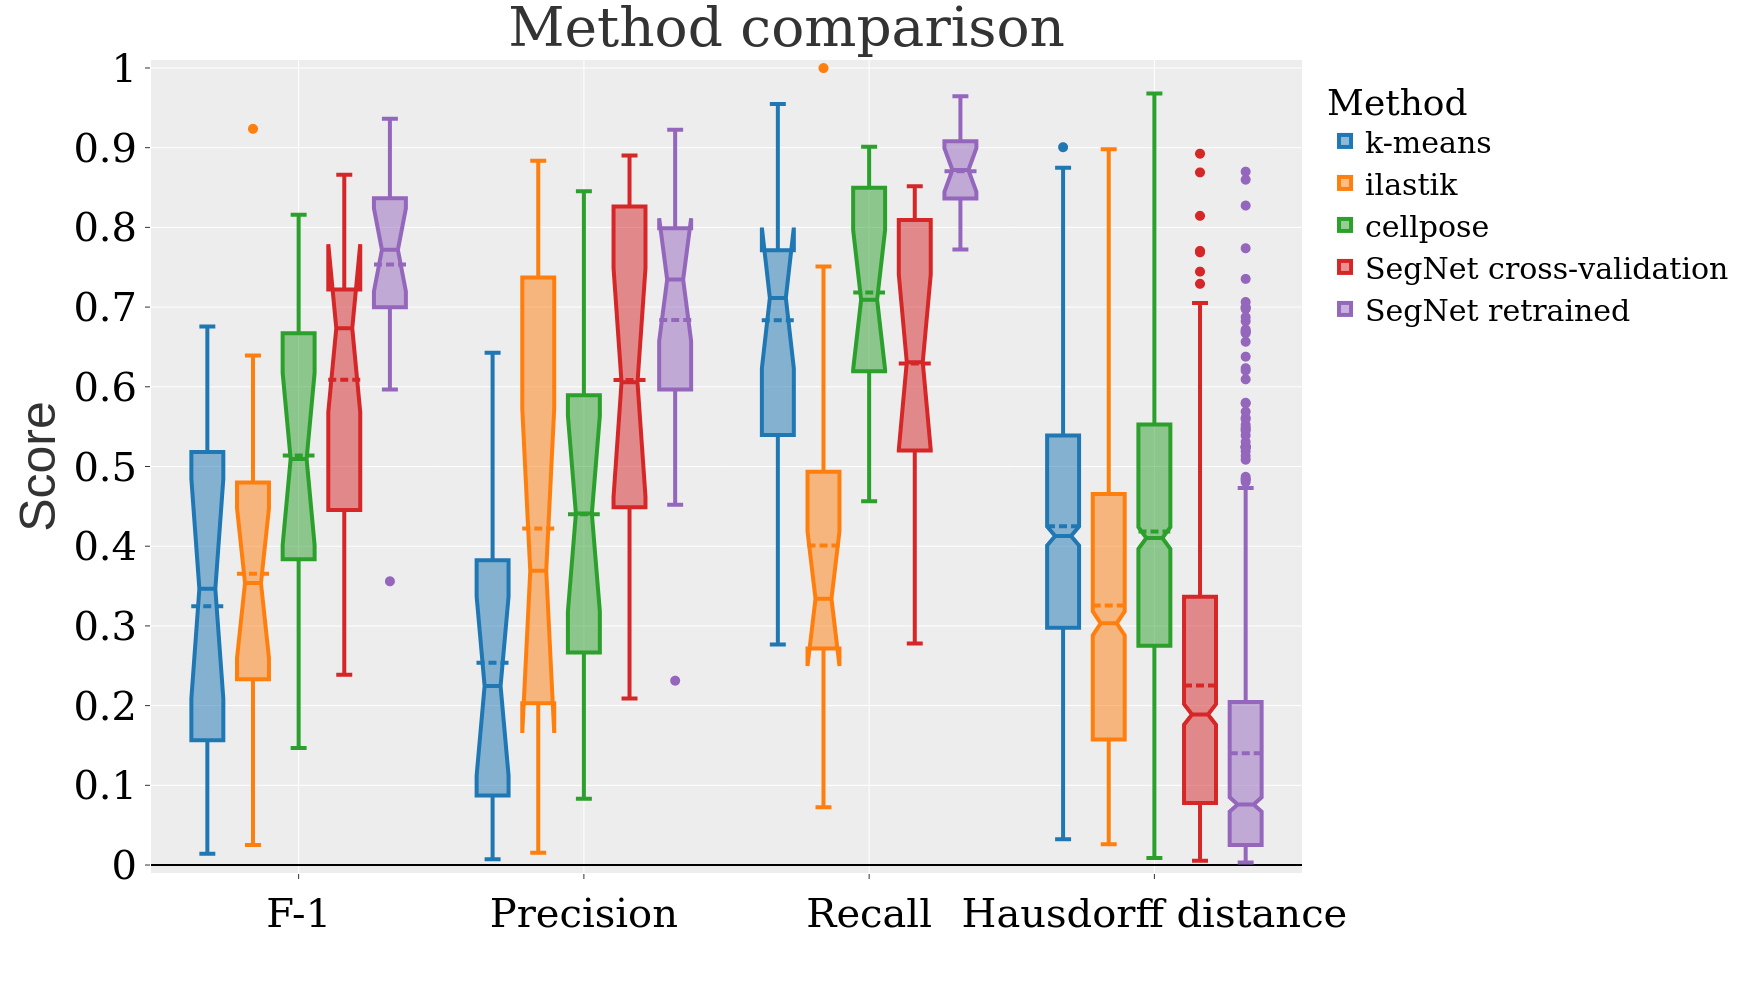

In [26]:
fig = px.box(df_methods_vis, x="variable", y="value", color="Method", points="outliers", notched=True, width=2500, height=1000, hover_data=["sample"], color_discrete_sequence=px.colors.qualitative.D3, category_orders={"variable": ["F-1", "Precision", "Recall", "Hausdorff distance"]}) # points=[all, outliers]

# title
fig.update_layout(
    title=dict(
        text=f"Method comparison",
    ),
    title_font_family="Candara",
    title_font_size=55,
    title_x=0.45,
    title_y=0.993
)

# x-axis
fig.update_xaxes(
    # categoryorder="category ascending",
    title="", #"Time Point",
    title_font_size=50,
    tickfont=dict(
        family="Candara",
        size=40,
        color="Black"
    ),
    zerolinewidth=2, 
    zerolinecolor='black',
#     title_standoff=50
)

# y-axis
fig.update_yaxes(
    title=f"Score",
    title_font_size=50,
    tickfont=dict(
        family="Candara",
        size=40,
        color="Black"
    ), 
    zerolinewidth=2, 
    zerolinecolor='black',
    title_standoff=25,
    dtick=0.1, 
    range=[-0.01, 1.01],
)

# legend
fig.update_layout(
    legend_title="Method",
    boxgap=0.2,
    boxgroupgap=0.3,
    legend=dict(
    yanchor="top",
    y=0.99,
    # xanchor="right",
    # x=0.99,
    font=dict(family="Candara", size=30, color="black"),
))

# lines width and marker size
fig.update_traces(
    line=dict(width=4.),
    marker={'size': 10}
)

# add means
fig.for_each_trace(lambda x: x.update(dict(boxmean=True)))

fig.show()

# fig.write_html(os.path.join(save_path_viz, f"Method-Metric_comparison.html"), include_plotlyjs="cdn")
# fig.write_image(file=os.path.join(save_path_viz, f"Method-Metric_comparison.png"), format="png")
# fig.write_image(file=os.path.join(save_path_viz, f"Method-Metric_comparison.svg"), format="svg")

In [6]:
df_fractions = pd.DataFrame()

for path_to_fraction, method in zip(path_to_fractions, methods):
    
    df_tmp = pd.read_csv(path_to_fraction, index_col=0)
    corr_pearson, p_value_pearson_mom_corr_coeff = stats.pearsonr(df_tmp['fat_fraction_prediction'], df_tmp['fat_fraction_annotation'])
    
    print(f"Method: {method} - Correlation-pearson: {corr_pearson} - p-value: {p_value_pearson_mom_corr_coeff}")
    df_fraction = pd.DataFrame(data={'Method': [method], 'Correlation': [corr_pearson], 'p-value': [p_value_pearson_mom_corr_coeff]}) 
    
    df_fractions = pd.concat([df_fractions, df_fraction])

# df_fractions.to_csv("./data/quantification/metric-evaluation/Pearsons_moment_correlation_coeffiecent.csv")

df_fractions

Method: k-means - Correlation-pearson: 0.3918613192501574 - p-value: 0.1198034384228753
Method: ilastik - Correlation-pearson: 0.1773004428559996 - p-value: 0.4960164068504102
Method: cellpose - Correlation-pearson: 0.9143005905948686 - p-value: 2.838505477779445e-07
Method: SegNet cross-validation - Correlation-pearson: 0.9706828879668609 - p-value: 1.0741485702701527e-10
Method: SegNet retrained - Correlation-pearson: 0.9921879847281388 - p-value: 5.628141519649973e-15


Method  Correlation       p-value
0                  k-means     0.391861  1.198034e-01
0                  ilastik     0.177300  4.960164e-01
0                 cellpose     0.914301  2.838505e-07
0  SegNet cross-validation     0.970683  1.074149e-10
0         SegNet retrained     0.992188  5.628142e-15

In [7]:
df_fractions_vis = pd.melt(df_fractions, id_vars=['Method'], value_vars=['Correlation'])
df_fractions_vis

Method     variable     value
0                  k-means  Correlation  0.391861
1                  ilastik  Correlation  0.177300
2                 cellpose  Correlation  0.914301
3  SegNet cross-validation  Correlation  0.970683
4         SegNet retrained  Correlation  0.992188

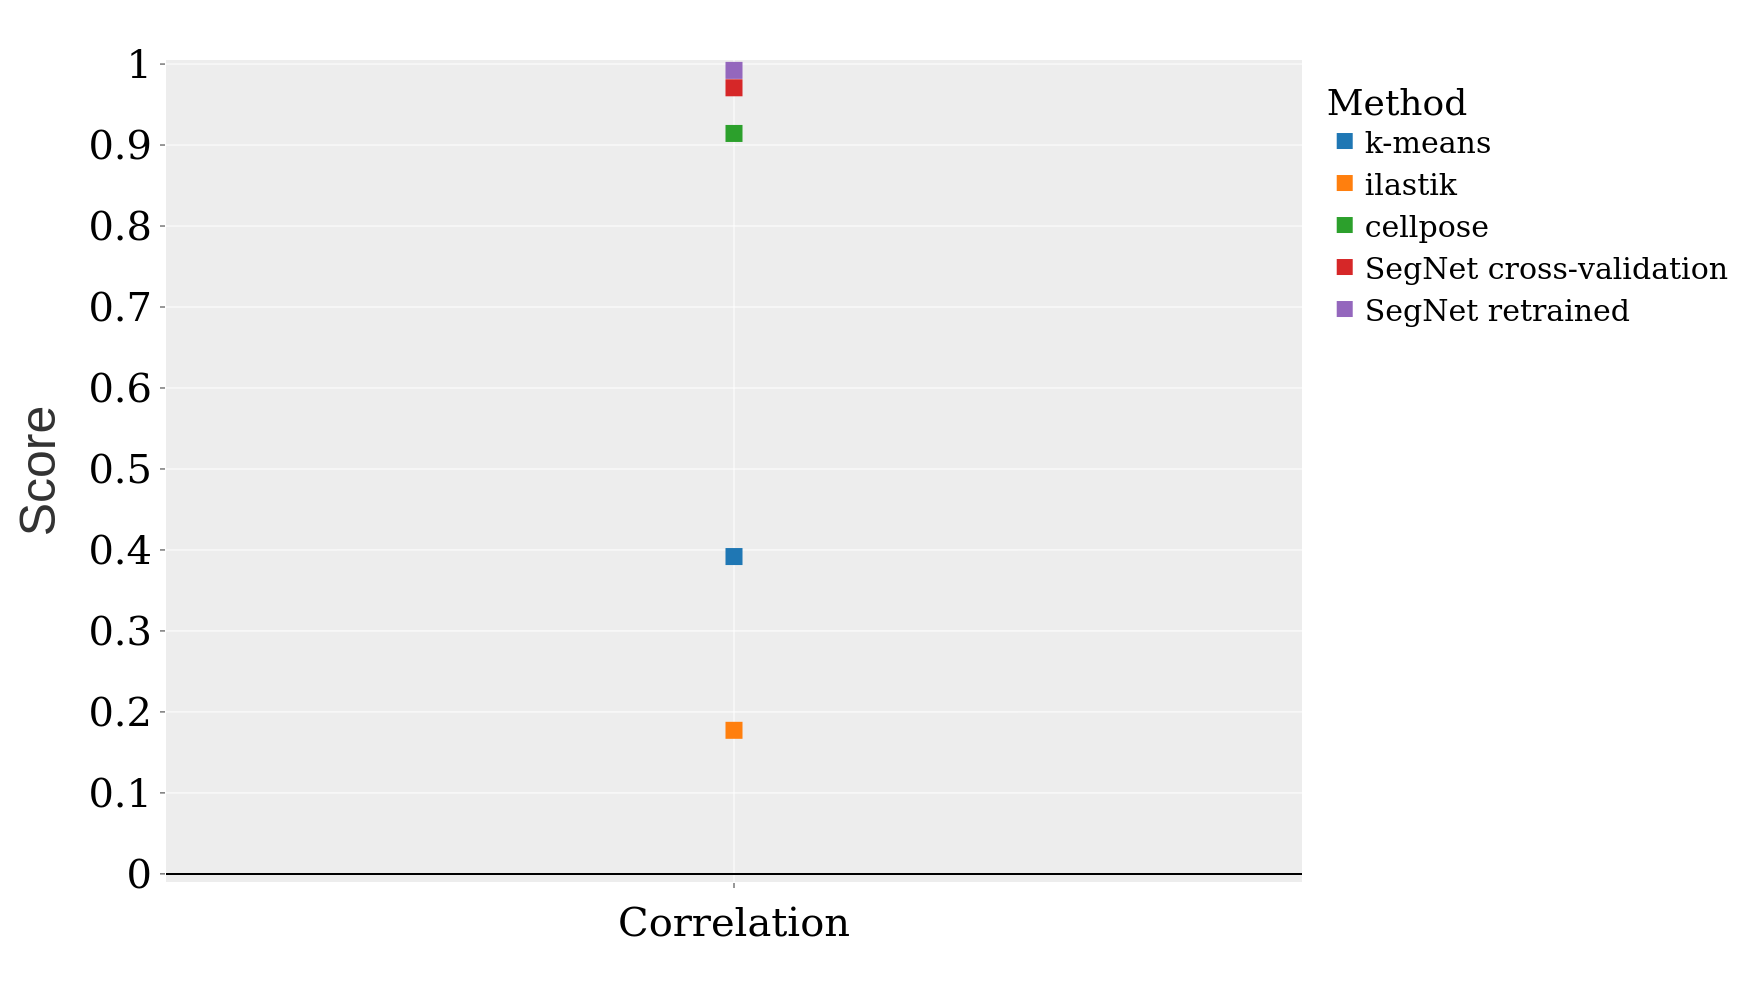

In [15]:
if 1:
    fig = px.scatter(df_fractions_vis, x="variable", y="value", color="Method", width=1000, height=1000, color_discrete_sequence=px.colors.qualitative.D3) # without jitter
    
    fig.update_traces(marker=dict(size=25, symbol="square"), selector=dict(mode="markers"))
else:
    fig = px.box(df_fractions_vis, x="variable", y="value", color="Method", points="all", width=800, height=1000, color_discrete_sequence=px.colors.qualitative.D3) #  with jitter
    
    # produce a jitter scatter-plot
    fig.for_each_trace(lambda x: x.update({'type': 'box',
                  'boxpoints': 'all',
                  'fillcolor': 'rgba(255,255,255,0)',
                  'hoveron': 'points',
                  # 'hovertemplate': 'value=%{x}<br>Corr=%{y}<extra></extra>',
                  'line': {'color': 'rgba(255,255,255,0)'},
                  'pointpos': 0,
                  'showlegend': True}))

# x-axis
fig.update_xaxes(
    categoryorder="category ascending",
    title="",
    tickfont=dict(
        family="Candara",
        size=40,
        color="Black"
    ),
    zerolinewidth=2, 
    zerolinecolor='black',
)

# y-axis
fig.update_yaxes(
    title=f"Score",
    title_font_size=50,
    tickfont=dict(
        family="Candara",
        size=40,
        color="Black"
    ), 
    zerolinewidth=2, 
    zerolinecolor='black',
    title_standoff=40,
    dtick=0.1, 
    range=[-0.01, 1.005],
)

# legend
fig.update_layout(
    legend_title="Method",
    boxgap=0.6,
    boxgroupgap=0.3,
    legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
#     x=0.01,
    font=dict(family="Candara", size=30, color="black"),
))

# lines width and marker size
fig.update_traces(
    line=dict(width=4.),
    marker={'size': 17}
)

fig.show()

fig.write_html(os.path.join(save_path_viz, f"Method-Corr_comparison.html"), include_plotlyjs="cdn")
fig.write_image(file=os.path.join(save_path_viz, f"Method-Corr_comparison.png"), format="png")
fig.write_image(file=os.path.join(save_path_viz, f"Method-Corr_comparison.svg"), format="svg")

# (3) Compare fat fraction of predictions with manual annotations and calculate the correlation of fat-fractions

## (3.1.0) Define save path

In [ ]:
#path_quantitative_results_performance = './data/prediction/cross-validation/images_KW/v2/' # KW - SegNet - cross-validation
#path_quantitative_results_performance = './data/prediction/cross-validation/images_DA/v2/' # DA - SegNet - cross-validation
#path_quantitative_results_performance = './data/prediction/cellpose/whole_sample/' # KW - cellpose
#path_quantitative_results_performance = './data/prediction/LAB_kmeans/C=3/' # HE-KW-LAB-kmeans-C=3
#path_quantitative_results_performance = './data/prediction/ilastik/'
#path_quantitative_results_performance = './data/prediction/SegNet_model-all/training/'  # KW - SegNet - final model

path_quantitative_results_performance = './data/quantification/fat/training_data/'

path_quantitative_results_performance

## (3.2) Using JIPipe output where first the corresponding tables will merged
### (3.2.0) Tissue mask - H&E / OilRed 

In [154]:
path_original = glob('./data/quantification/tissue_mask/training_data/manual_annotation/*.csv') # KW - H&E
#path_original = glob('./data/images/DA/H&E/quantitative_ROI_analysis_tissue/*.csv') # DA - H&E

#print(*[x.split('/')[-1] for x in np.sort(path_original)], sep='\n')  
print("\nNumber of samples:", len(path_original))


Number of samples: 17


### (3.2.1) Fat fraction of manual annotation - H&E

In [155]:
path_label = glob('./data/quantification/fat/training_data/KW-manual_annotation/*.csv') # KW - H&E
#path_label = glob('./data/images/DA/H&E/quantitative_ROI_analysis_manualAnnotation/*.csv') # DA - H&E

#print(*[x.split('/')[-1] for x in np.sort(path_label)], sep='\n')  
print("\nNumber of samples:", len(path_label))


Number of samples: 17


### (3.2.2) Fat fraction of model-predictions / LAB-kmeans / ilastik

In [160]:
path_prediction = glob('./data/prediction/SegNet_cross-validation/images_KW/FAT_FRACTION/Data/*.csv') # KW - SegNet - cross-validation
#path_prediction = glob('./data/prediction/cross-validation/images_DA/v2/FAT_FRACTION/Data/*.csv') # DA - SegNet - cross-validation
#path_prediction = glob('./data/prediction/cellpose/whole_sample/FAT_FRACTION/Data/*.csv') # KW - cellpose
#path_prediction = glob('./data/prediction/LAB_kmeans/C=3/FAT_FRACTION/Data/*.csv') # HE-KW-LAB-kmeans-C=3
#path_prediction = glob('./data/prediction/ilastik/whole-samples/FAT_FRACTION/Data/*.csv') # HE-KW-ilastik
#path_prediction = glob('./data/quantification/fat/training_data/KW-vs-SegNet_model-all/Data/*.csv') # KW - SegNet - final model

#print(*[x.split('/')[-1] for x in np.sort(path_prediction)], sep='\n')  
print("\nNumber of samples:", len(path_prediction))


Number of samples: 17


### (3.2.3) Path to metric evaluation

In [ ]:
path_metric_evaluation = './data/prediction/SegNet_cross-validation/images_KW/quantitative_results_performance_POI/Metric_evaluation.csv' # KW - SegNet
#path_metric_evaluation = './data/prediction/cross-validation/images_DA/quantitative_results_performance_POI/Metric_evaluation.csv' # DA - SegNet
#path_metric_evaluation = None

if path_metric_evaluation is None:
    df_scores = 0
else:
    print(f"file to path: <{path_metric_evaluation}> exist: {os.path.exists(path_metric_evaluation)}")
    df_scores = pd.read_csv(path_metric_evaluation, index_col=0)    
    
df_scores

### (3.2.4) Merge all information into one table 

In [166]:
arr_all = []

for idx, path_tmp_original in enumerate(path_original):
    
    # get the actual sample
    abbrevation = os.path.splitext(os.path.basename(path_tmp_original))[0]    
    abbrevation = abbrevation.split('#Dataset=')[1]    
    #abbrevation = abbrevation.split('Min Threshold=1_Max Threshold=256_#Dataset=')[1].split('_Threshold=')[0] # HE-KW/DA
    abbrevation = abbrevation.split('_Min Threshold')[0] # HE-KW/DA
                    
    # get the corresponding label and prediction / oilred files
    path_tmp_label = [x for x in path_label if abbrevation in x][0]
    path_tmp_prediction = [x for x in path_prediction if abbrevation in x][0]
     
    df_original = pd.read_csv(path_tmp_original)
    area_slice = df_original['Area'].sum()
    
    df_label = pd.read_csv(path_tmp_label)
    fat_label = df_label['Area'].sum()
    
    df_prediction = pd.read_csv(path_tmp_prediction)
    fat_prediction = df_prediction['Area'].sum()
        
    # get the model-id
    if isinstance(df_scores, int):
        model_id = 0 
    else:
        model_id = int(df_scores.loc[abbrevation, :]["model_id"])      
    
    arr = [abbrevation, area_slice, model_id, fat_label, fat_prediction]
        
    print(f'[{idx}/{len(path_original)-1}] - sample: {abbrevation} - area slice: {area_slice} - fat annotation: {fat_label} - fat prediction: {fat_prediction} - model-id: {model_id}')
    
    arr_all.append(arr)
    
    #break    

[0/16] - sample: S41.1_Control_H&E_10x_s2 - area slice: 94869749 - fat annotation: 6622916 - fat prediction: 6413613 - model-id: 1
[1/16] - sample: GTS01.4_OLD_H&E_10x - area slice: 88531126 - fat annotation: 2019074 - fat prediction: 1852845 - model-id: 0
[2/16] - sample: S47.4_SHAM_H&E_10x - area slice: 50410655 - fat annotation: 823370 - fat prediction: 1130923 - model-id: 7
[3/16] - sample: UTS01.4_OP_H&E_10x - area slice: 78908123 - fat annotation: 162943 - fat prediction: 217363 - model-id: 1
[4/16] - sample: JTS01.3_FemurTest_H&E-10x - area slice: 130734829 - fat annotation: 5653674 - fat prediction: 4272527 - model-id: 7
[5/16] - sample: GTS01.1_OLD_H&E_10x - area slice: 93582511 - fat annotation: 1535861 - fat prediction: 1714735 - model-id: 6
[6/16] - sample: S43.4_H&E-Bild-Export-11_s2 - area slice: 100034304 - fat annotation: 1135138 - fat prediction: 2058363 - model-id: 5
[7/16] - sample: UTS02.1_OP_H&E_10x - area slice: 39329812 - fat annotation: 97989 - fat prediction: 1

### (3.2.5) Calculate the fat fraction of annotations and predictions 

In [167]:
df_fractions = pd.DataFrame(arr_all, columns=['sample', 'area_slice', 'model_id', 'fat_annotation', 'fat_prediction'])

# calculate the fat fraction of annotations and predictions 
df_fractions['fat_fraction_prediction'] = df_fractions['fat_prediction'] / df_fractions['area_slice']
df_fractions['fat_fraction_annotation'] = df_fractions['fat_annotation'] / df_fractions['area_slice']

# convert model-id column to string
df_fractions["model_id"] = df_fractions["model_id"].astype(str)

print(df_fractions.shape, df_fractions.dtypes)
df_fractions

(17, 7) sample                      object
area_slice                   int64
model_id                    object
fat_annotation               int64
fat_prediction               int64
fat_fraction_prediction    float64
fat_fraction_annotation    float64
dtype: object


sample  area_slice model_id  fat_annotation  \
0      S41.1_Control_H&E_10x_s2    94869749        1         6622916   
1           GTS01.4_OLD_H&E_10x    88531126        0         2019074   
2            S47.4_SHAM_H&E_10x    50410655        7          823370   
3            UTS01.4_OP_H&E_10x    78908123        1          162943   
4     JTS01.3_FemurTest_H&E-10x   130734829        7         5653674   
5           GTS01.1_OLD_H&E_10x    93582511        6         1535861   
6   S43.4_H&E-Bild-Export-11_s2   100034304        5         1135138   
7            UTS02.1_OP_H&E_10x    39329812        5           97989   
8         S34.3_DC07_H&E_10x_s3    69447198        0          831095   
9    JTS04.3_PCAControl_H&E_10x    23736207        0          303612   
10           S51.1_SHAM_H&E_10x    76184798        4         7563770   
11         S53.1_2_SHAM_H&E_10x    14296615        4         1023874   
12        S35.4_SHAM_H&E_10x_s3   122393655        3        12869554   
13        S37.3_SHAM_H&E_10x_s2    70161343        3         2261516   
14        S46.3_SHAM_H&E_10x_s2    48775987        6          812967   
15           S50.4_SHAM_H&E_10x    80386120        2        11812492   
16        S42.4_DC04_H&E_10x_s4    55797018        2         2647864   

    fat_prediction  fat_fraction_prediction  fat_fraction_annotation  
0          6413613                 0.067604                 0.069811  
1          1852845                 0.020929                 0.022806  
2          1130923                 0.022434                 0.016333  
3           217363                 0.002755                 0.002065  
4          4272527                 0.032681                 0.043245  
5          1714735                 0.018323                 0.016412  
6          2058363                 0.020577                 0.011347  
7           137320                 0.003491                 0.002491  
8           821578                 0.011830                 0.011967  
9           260439                 0.010972                 0.012791  
10         7191492                 0.094395                 0.099282  
11          910760                 0.063705                 0.071617  
12         8966959                 0.073263                 0.105149  
13         2306337                 0.032872                 0.032233  
14         1092618                 0.022401                 0.016667  
15         9688319                 0.120522                 0.146947  
16         3661803                 0.065627                 0.047455

In [173]:
path_quantitative_results_performance = './data/quantification/fat/'

In [23]:
# optional: save/load the dataframe-table
#df_fractions.to_csv(os.path.join(path_quantitative_results_performance, 'fat_fraction.csv'))
df_fractions = pd.read_csv('./data/quantification/fat/training_data/DA-vs-KWSegNet/fat_fraction.csv', index_col=0)

df_fractions

area_slice                   int64
model_id                     int64
fat_annotation               int64
fat_prediction               int64
fat_fraction_prediction    float64
fat_fraction_annotation    float64
dtype: object

### (3.2.6) Plot fat-fraction comparison via seaborn  

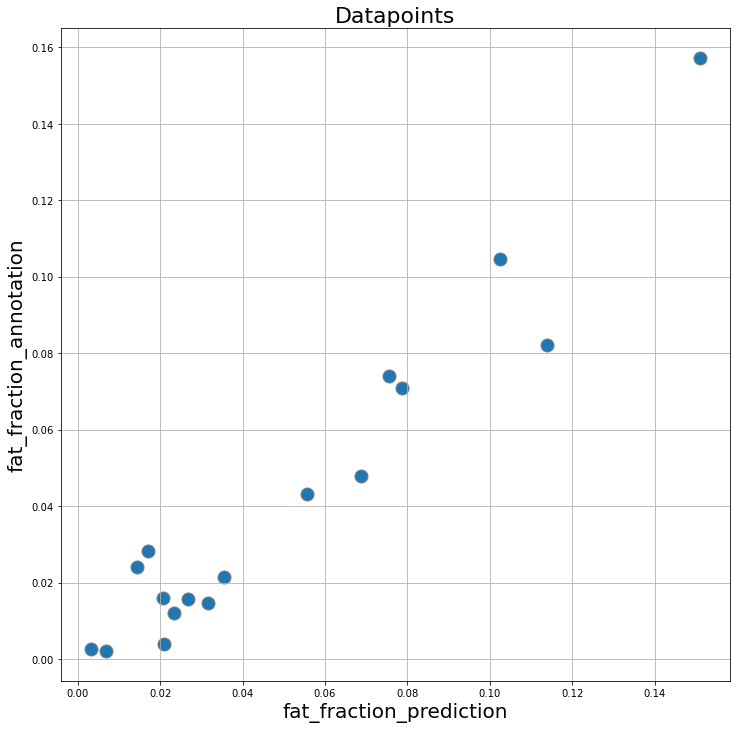

In [24]:
plt.figure(figsize=(12, 12))
plt.grid(True)
hue_order = [str(x) for x in np.arange(8)]

if isinstance(df_scores, int):
    sns.scatterplot(data=df_fractions, x='fat_fraction_prediction', y='fat_fraction_annotation', 
                s=170, edgecolor='gray', linewidth=1, palette=sns.color_palette("Set1", 8), hue_order=hue_order)
else:
    sns.scatterplot(data=df_fractions, x='fat_fraction_prediction', y='fat_fraction_annotation', hue='model_id', 
                s=170, edgecolor='gray', linewidth=1, palette=sns.color_palette("Set1", 8), hue_order=hue_order)

    plt.legend(loc='upper left', prop={'size': 20})
#plt.xticks(myticks, fontsize=15); plt.yticks(myticks, fontsize=15)

plt.title('Datapoints', fontsize=22)
plt.xlabel("fat_fraction_prediction",fontsize=20)
plt.ylabel("fat_fraction_annotation",fontsize=20)

plt.savefig(os.path.join(path_quantitative_results_performance, 'scatterplot.png'), dpi=300)
plt.show()

### (3.2.7) Print the correlation of the manual annotations and the predictions

In [25]:
corr_spearman = df_fractions[['fat_fraction_prediction', 'fat_fraction_annotation']].corr(method='spearman').iloc[0,1]
corr_pearson = df_fractions[['fat_fraction_prediction', 'fat_fraction_annotation']].corr(method='pearson').iloc[0,1]

print('corr_spearman:\t', corr_spearman)
print('corr_pearson:\t', corr_pearson)

corr_spearman:	 0.8480392156862745
corr_pearson:	 0.9644177414538634


### (3.2.8) Plot KW/DA vs. SegNet/ilastik/LABkmeans 

In [26]:
x_max_value = df_fractions.max()['fat_fraction_prediction']
y_max_value = df_fractions.max()['fat_fraction_annotation']

max_value = np.round(np.max([x_max_value, y_max_value]), decimals=2) + .01
max_value

0.17

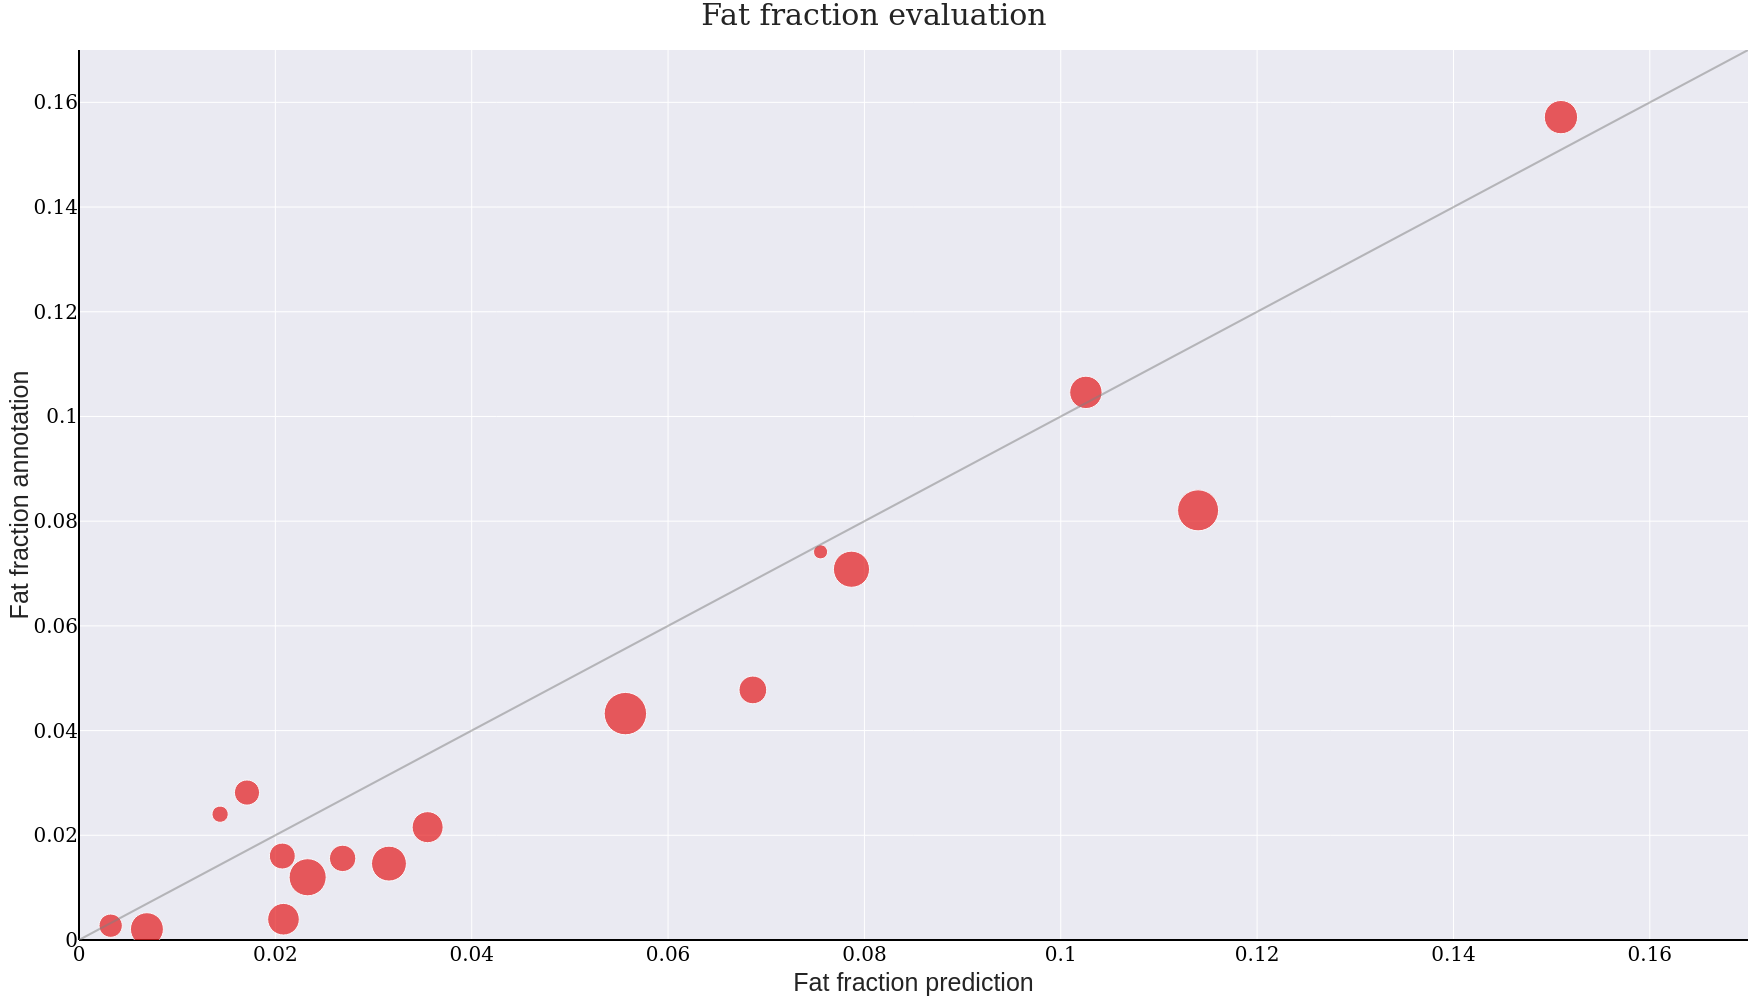

In [27]:
hue_order = [str(x) for x in np.arange(8)]

if isinstance(df_scores, int):
    # without model-id
    fig = px.scatter(df_fractions, x="fat_fraction_prediction", y="fat_fraction_annotation", size='area_slice', size_max=30, 
                     width=1100, height=1000, color_discrete_sequence=px.colors.qualitative.Set1, opacity=0.7, template="seaborn")
else:
    # with model-ids
    fig = px.scatter(df_fractions, x="fat_fraction_prediction", y="fat_fraction_annotation", color="model_id", size='area_slice', size_max=30, 
                     width=1100, height=1000, color_discrete_sequence=px.colors.qualitative.Set1, category_orders={'model_id': hue_order}, opacity=0.7, template="seaborn") 


fig.add_trace(
    go.Scatter(
        x=[0, max_value],
        y=[0, max_value],
        mode="lines",
        line=go.scatter.Line(color="gray"),
        opacity=0.5,
        showlegend=False)
)

#fig.update_traces(
#    marker=dict(sizeref=6)
#)

# title
fig.update_layout(
    title=dict(
        text="Fat fraction evaluation"        
    ),
    title_font_family="Candara",
    title_font_size=30
)

# legend
fig.update_layout(
    legend=dict(
        title="model-id",
        font=dict(size=25,
        family="Candara",
        color="Black",
        )
    ),
    margin=dict(l=0, t=50,r=0, b=0, pad=0), 
    boxgroupgap=0.25,
    legend_itemwidth=50
)

# x-axis
fig.update_xaxes(
    title="Fat fraction prediction",
    title_font_size=25,
    showticklabels=True,
    rangemode="tozero",
    #tick0=0.02, 
    #dtick=0.01,
    range=[0, max_value],
    tickfont=dict(
        family="Candara",
        size=20,
        color="Black"
    ),
    zerolinewidth=2, 
    zerolinecolor='black'
)

# y-axis
fig.update_yaxes(
    title="Fat fraction annotation",
    title_font_size=25,
    showticklabels=True,
    rangemode="tozero",
    #tick0=0.02, 
    #dtick=0.01,
    range=[0, max_value],
    tickfont=dict(
        family="Candara",
        size=20,
        color="Black"
    ),
    zerolinewidth=2, 
    zerolinecolor='black'
)

# grid
fig.update_layout(
    grid=dict(xgap=0.1, ygap=0.1)
)

fig.show()

fig.write_html(os.path.join(path_quantitative_results_performance, "fat-fraction.html"), include_plotlyjs="cdn")
fig.write_image(file=os.path.join(path_quantitative_results_performance, "fat-fraction.png"), format="png")
fig.write_image(file=os.path.join(path_quantitative_results_performance, "fat-fraction.svg"), format="svg")

# (4) Evaluate fat-fraction of KW vs. DA annotations
## (4.0) Combine fat-fraction of KW vs. DA annotations

In [ ]:
df_fractions_KW = pd.read_csv('./data/prediction/H&E/SegNet_cross-validation/fat-fraction_KW-vs-SegNet.csv', index_col=0) # KW - H&E
df_fractions_DA = pd.read_csv('./data/prediction/H&E/SegNet_cross-validation/images_DA/FAT_FRACTION/fat-fraction_DA-vs-SegNet.csv', index_col=0) # DA - H&E

hue_order = [str(x) for x in np.arange(8)]

# create a dataframe with merged fat-fraction of KW & DA
df_fractions_combined = df_fractions_KW[['sample', 'area_slice', 'model_id', 'fat_fraction_annotation']]
df_fractions_combined = df_fractions_combined.rename(columns={'fat_fraction_annotation':'fat_fraction_KW'}, inplace = False)
df_fractions_combined = df_fractions_combined.merge(right=df_fractions_DA, how='inner')
df_fractions_combined = df_fractions_combined.rename(columns={'fat_fraction_annotation':'fat_fraction_DA'}, inplace = False)
df_fractions_combined["model_id"] = df_fractions_combined["model_id"].astype(str)
df_fractions_combined = df_fractions_combined[['sample', 'area_slice', 'model_id', 'fat_fraction_KW', 'fat_fraction_DA']]

# optional: save KA vs. DA manual annotations datatable
#df_fractions_combined.to_csv(os.path.join("./", 'fat_fraction.csv'))

df_fractions_combined

sample   area_slice model_id  fat_fraction_KW  \
0     JTS01.3_FemurTest_H&E-10x  1434.552211        7         0.041143   
1         S35.4_SHAM_H&E_10x_s3  1220.033711        3         0.076957   
2         S46.3_SHAM_H&E_10x_s2   535.838411        6         0.016015   
3   S43.4_H&E-Bild-Export-11_s2  1076.445767        5         0.011722   
4         S42.4_DC04_H&E_10x_s4   601.265000        2         0.047315   
5         S37.3_SHAM_H&E_10x_s2  7453.946217        3         0.023481   
6           GTS01.4_OLD_H&E_10x   885.549022        0         0.016261   
7            S51.1_SHAM_H&E_10x   827.528011        4         0.092293   
8            S50.4_SHAM_H&E_10x   876.436000        2         0.119701   
9            UTS02.1_OP_H&E_10x   435.162000        5         0.002505   
10           UTS01.4_OP_H&E_10x   851.047067        1         0.002126   
11           S47.4_SHAM_H&E_10x   550.987033        7         0.015594   
12         S53.1_2_SHAM_H&E_10x   157.743000        4         0.072067   
13     S41.1_Control_H&E_10x_s2  1044.356556        1         0.070084   

    fat_fraction_DA  
0          0.041143  
1          0.053656  
2          0.016225  
3          0.012369  
4          0.045879  
5          0.017312  
6          0.007700  
7          0.097821  
8          0.127787  
9          0.002746  
10         0.002126  
11         0.015167  
12         0.074615  
13         0.070765

## (4.1) Print the correlation of the manual annotations and the predictions

In [29]:
corr_spearman = df_fractions_combined[['fat_fraction_KW', 'fat_fraction_DA']].corr(method='spearman').iloc[0,1]
corr_pearson = df_fractions_combined[['fat_fraction_KW', 'fat_fraction_DA']].corr(method='pearson').iloc[0,1]

print('corr_spearman:\t', corr_spearman)
print('corr_pearson:\t', corr_pearson)

corr_spearman:	 0.9604395604395605
corr_pearson:	 0.9818015710183594


## (4.2) Plot fat-fraction of KW vs. DA manual annotations 

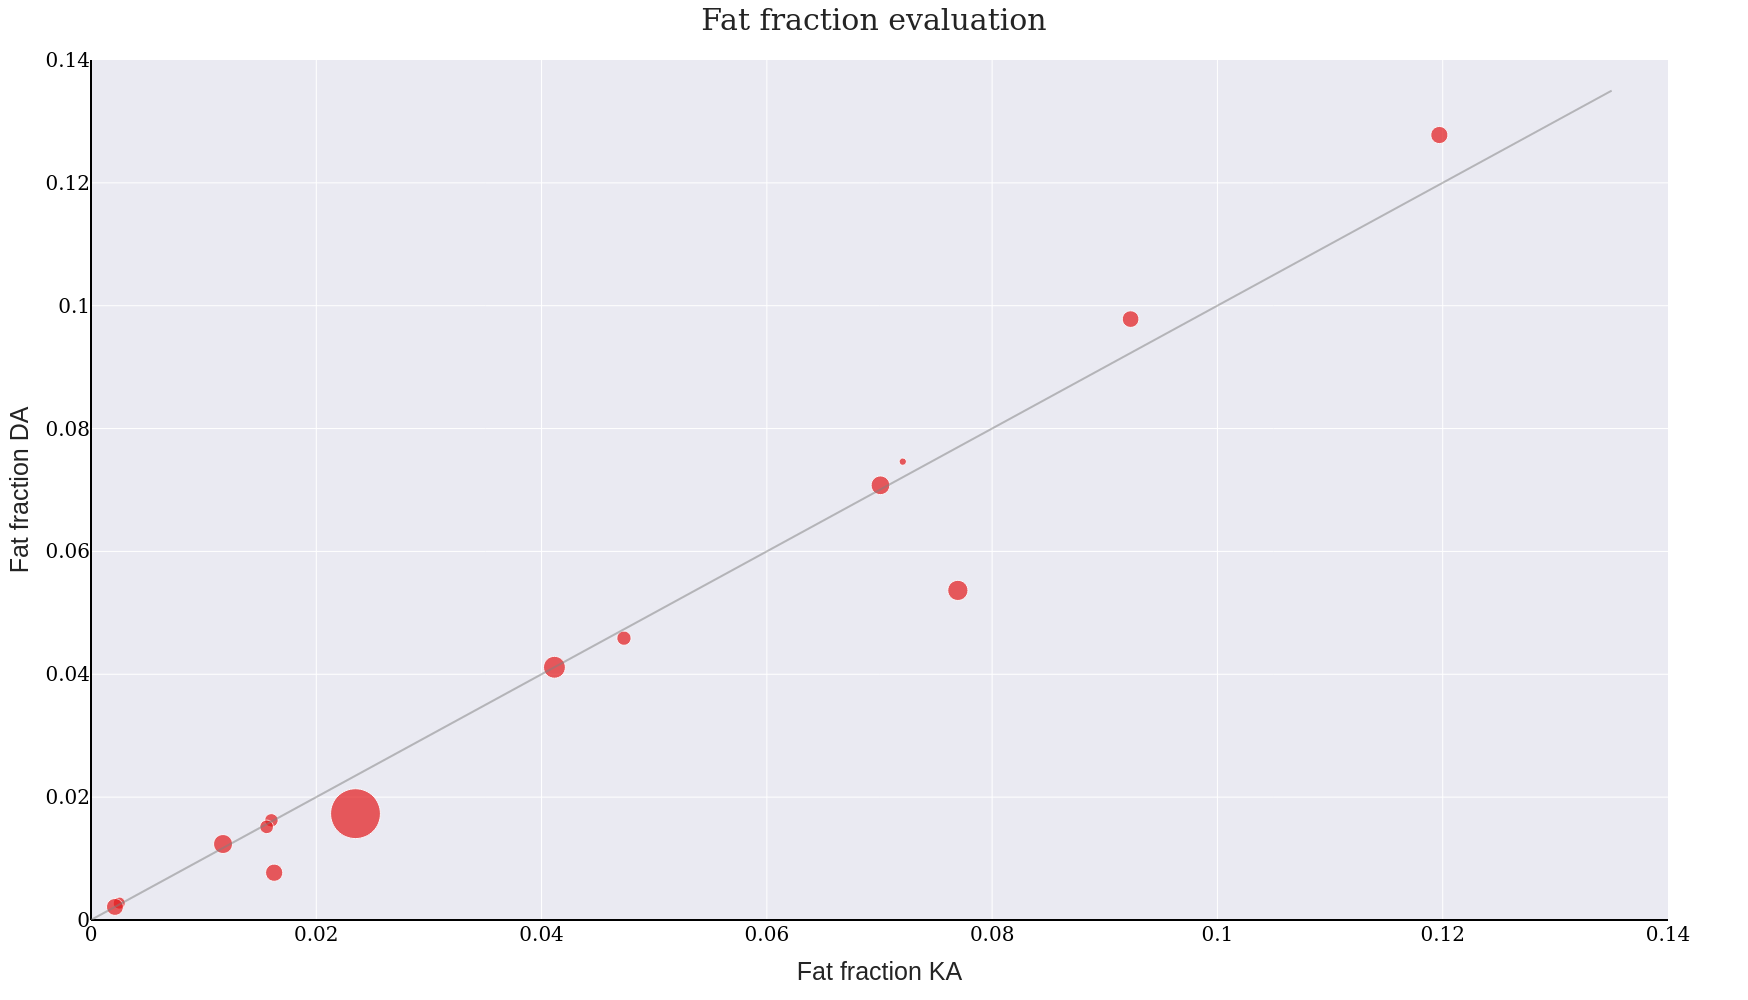

In [36]:
# KW vs. DA manual annotations
fig = px.scatter(df_fractions_combined, x="fat_fraction_KW", y="fat_fraction_DA", size='area_slice', size_max=30, 
                 width=1100, height=1000, color_discrete_sequence=px.colors.qualitative.Set1, category_orders={'model_id': hue_order}, opacity=0.7, template="seaborn")

fig.add_trace(
    go.Scatter(
        x=[0, 0.135],
        y=[0, 0.135],
        mode="lines",
        line=go.scatter.Line(color="gray"),
        opacity=0.5,
        showlegend=False)
)

fig.update_traces(
    marker=dict(sizeref=6)
)

# title
fig.update_layout(
    title=dict(
        text="Fat fraction evaluation"        
    ),
    title_font_family="Candara",
    title_font_size=30
)

# x-axis
fig.update_xaxes(
    title="Fat fraction KA",
    title_font_size=25,
    showticklabels=True,
    rangemode="tozero",
    range=[0, 0.14],
    tickfont=dict(
        family="Candara",
        size=20,
        color="Black"
    ),
    zerolinewidth=2, 
    zerolinecolor='black'
)

# y-axis
fig.update_yaxes(
    title="Fat fraction DA",
    title_font_size=25,
    showticklabels=True,
    rangemode="tozero",
    range=[0, 0.14],
    tickfont=dict(
        family="Candara",
        size=20,
        color="Black"
    ),
    zerolinewidth=2, 
    zerolinecolor='black'
)
    
# grid
fig.update_layout(
    grid = dict(
        xgap=0.1
    )
)

fig.show()

fig.write_html("fat_fraction.html", include_plotlyjs="cdn")
fig.write_image(file="fat_fraction.png", format="png")
fig.write_image(file="fat_fraction.svg", format="svg")

## (4.3) Analyse the smallest annotated ROI / fat region

In [ ]:
path_mask_ROIs = glob('./data/images/KW/H&E/quantitative_ROI_analysis/Data/*')
path_mask_ROIs

In [71]:
df_all = pd.DataFrame(columns=['Area', 'Min', 'Max', 'X', 'Y', 'sample'])

for idx, path_tmp in enumerate(path_mask_ROIs):
    
    filename_tmp = path_tmp.split('/')[-1].split('_128.0.csv')[0]
    df_tmp = pd.read_csv(path_tmp)
    
    print(f"[{idx+1} / {len(path_mask_ROIs)}] read image with shape: {df_tmp.shape} from path: {filename_tmp}")
    
    df_tmp['sample'] = filename_tmp 
    
    df_all = df_all.append(df_tmp)
    
df_all

[1 / 17] read image with shape: (148, 5) from path: GTS01.4_OLD_H&E_10x
[2 / 17] read image with shape: (323, 5) from path: S35.4_SHAM_H&E_10x_s3
[3 / 17] read image with shape: (131, 5) from path: S50.4_SHAM_H&E_10x
[4 / 17] read image with shape: (153, 5) from path: S42.4_DC04_H&E_10x_s4
[5 / 17] read image with shape: (116, 5) from path: S46.3_SHAM_H&E_10x_s2
[6 / 17] read image with shape: (42, 5) from path: UTS02.1_OP_H&E_10x
[7 / 17] read image with shape: (91, 5) from path: JTS04.3_PCAControl_H&E_10x
[8 / 17] read image with shape: (74, 5) from path: GTS01.1_OLD_H&E_10x
[9 / 17] read image with shape: (179, 5) from path: S43.4_H&E-Bild-Export-11_s2
[10 / 17] read image with shape: (124, 5) from path: S37.3_SHAM_H&E_10x_s2
[11 / 17] read image with shape: (36, 5) from path: UTS01.4_OP_H&E_10x
[12 / 17] read image with shape: (62, 5) from path: S34.3_DC07_H&E_10x_s3
[13 / 17] read image with shape: (175, 5) from path: S53.1_2_SHAM_H&E_10x
[14 / 17] read image with shape: (527, 5) 

Area  Min  Max          X         Y               sample
0     17627    0  255   6756.832  2146.908  GTS01.4_OLD_H&E_10x
1      5230  255  255   6943.546  2187.701  GTS01.4_OLD_H&E_10x
2    284409  255  255   9100.324  3071.397  GTS01.4_OLD_H&E_10x
3     15414  255  255   9904.356  2959.193  GTS01.4_OLD_H&E_10x
4      5373  255  255  10199.089  3067.576  GTS01.4_OLD_H&E_10x
..      ...  ...  ...        ...       ...                  ...
111    2817  255  255   4596.495  6764.764   S47.4_SHAM_H&E_10x
112    6780  255  255   6001.004  6820.808   S47.4_SHAM_H&E_10x
113    7253  255  255   4545.948  6966.534   S47.4_SHAM_H&E_10x
114    4209  255  255   5636.776  6965.962   S47.4_SHAM_H&E_10x
115   71235  255  255   7104.950  7197.398   S47.4_SHAM_H&E_10x

[3385 rows x 6 columns]

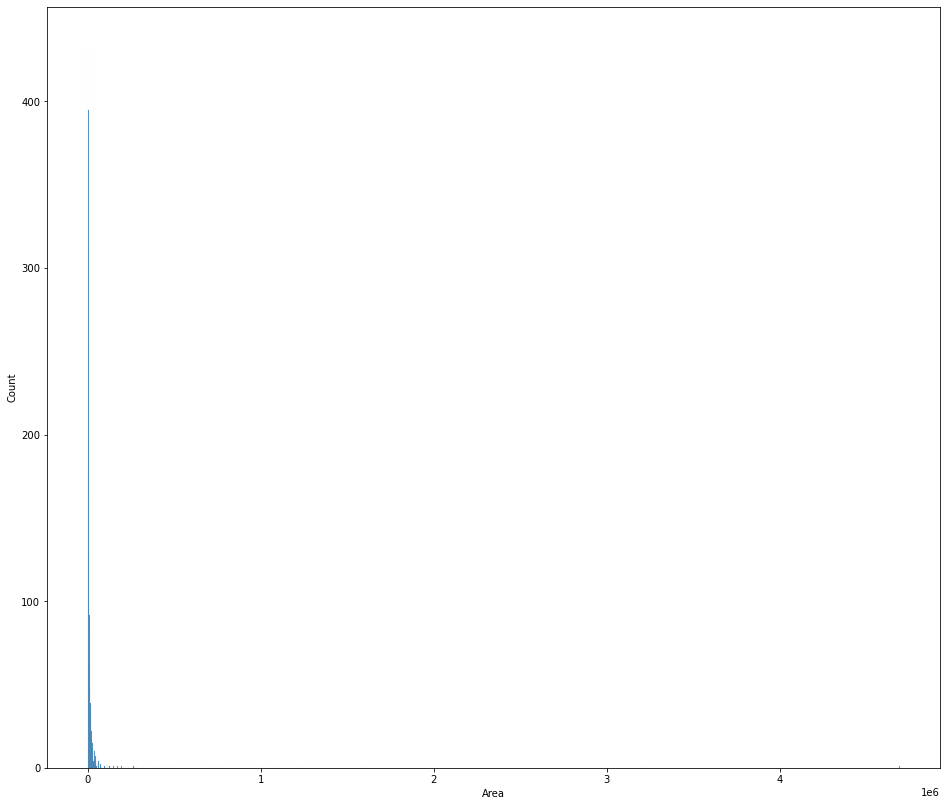

In [72]:
plt.figure(figsize=(16,14))
sns.histplot(data=df_all, x="Area")
plt.show()

In [73]:
print('minimum Area:')
df_all.min()

minimum Area:


Area                       21
Min                         0
Max                       255
X                     507.426
Y                     279.291
sample    GTS01.1_OLD_H&E_10x
dtype: object

# (5) Evaluate KW / DA manual annotations vs. OilRed fat-fraction
## (5.0) Tissue mask - H&E 

In [108]:
#path_tissue_HE = glob('./data/images/KW/H&E/quantitative_ROI_analysis_tissue/*.csv') # KW - H&E
path_tissue_HE = glob('./data/images/DA/H&E/quantitative_ROI_analysis_tissue/*.csv') # DA - H&E

print(*[x.split('/')[-1] for x in np.sort(path_tissue_HE)], sep='\n')  
print("\nNumber of samples:", len(path_tissue_HE))

Min Threshold=1_Max Threshold=256_#Dataset=GTS01.1_OLD_H&E_10x_Threshold=94.0.csv
Min Threshold=1_Max Threshold=256_#Dataset=GTS01.4_OLD_H&E_10x_Threshold=98.0.csv
Min Threshold=1_Max Threshold=256_#Dataset=JTS01.3_FemurTest_H&E-10x_Threshold=95.0.csv
Min Threshold=1_Max Threshold=256_#Dataset=JTS04.3_PCAControl_H&E_10x_Threshold=66.0.csv
Min Threshold=1_Max Threshold=256_#Dataset=S34.3_DC07_H&E_10x_s3_Threshold=93.0.csv
Min Threshold=1_Max Threshold=256_#Dataset=S35.4_SHAM_H&E_10x_s3_Threshold=97.0.csv
Min Threshold=1_Max Threshold=256_#Dataset=S37.3_SHAM_H&E_10x_s2_Threshold=96.0.csv
Min Threshold=1_Max Threshold=256_#Dataset=S41.1_Control_H&E_10x_s2_Threshold=96.0.csv
Min Threshold=1_Max Threshold=256_#Dataset=S42.4_DC04_H&E_10x_s4_Threshold=95.0.csv
Min Threshold=1_Max Threshold=256_#Dataset=S43.4_H&E-Bild-Export-11_s2_Threshold=91.0.csv
Min Threshold=1_Max Threshold=256_#Dataset=S46.3_SHAM_H&E_10x_s2_Threshold=101.0.csv
Min Threshold=1_Max Threshold=256_#Dataset=S47.4_SHAM_H&E_10x

## (5.1) Tissue mask - OilRed

In [109]:
path_tissue_OilRed = glob('./data/images/KW/OilRed/FAT_FRACTION/tissue_area/Data/*.csv') # KW - OilRed

print(*[x.split('/')[-1] for x in np.sort(path_tissue_OilRed)], sep='\n')  
print("\nNumber of samples:", len(path_tissue_OilRed))

GTS01.1_OLD_OilRed_10x_walluks_178.0.csv
GTS01.4_OLD_OilRed_10x_walluks_168.0.csv
JTS01.3_FemurTest_OilRed-10x_walluk_193.0.csv
JTS04.3_PCAControl_OilRed_10x_walluks_191.0.csv
S34.3_DC07_OilRed_10x_s3_walluks_159.0.csv
S35.3_OilRed-Bild-Export-07_s3_159.0.csv
S37.3_SHAM_oil Red_10x_s2_walluks_160.0.csv
S41.1_Control_OilRed_10x_s2_walluks__172.0.csv
S42.4_DC04_OilRed_10x_s4_walluks_157.0.csv
S43.4_OilRed-Bild-Export-11_s2_157.0.csv
S46.3_SHAM_OilRed_10x_s2_walluks_159.0.csv
S47.4_SHAM_OilRed_10x_walluks_147.0.csv
S50.4_SHAM_OilRed_10x_walluks_167.0.csv
S51.1_SHAM_OilRed_10x_walluks_165.0.csv
S53.1_SHAM_OilRed_10x_walluks_156.0.csv
UTS01.4_OP_OilRed_10x_walluks_174.0.csv
UTS02.1_OP_OilRed_10x_walluks_173.0.csv

Number of samples: 17


## (5.2) Fat fraction of manual annotation - H&E

In [110]:
#path_label_HE = glob('./data/images/KW/H&E/quantitative_ROI_analysis_manualAnnotation/*.csv') # KW - H&E
path_label_HE = glob('./data/images/DA/H&E/quantitative_ROI_analysis_manualAnnotation/*.csv') # DA - H&E

#print(*[x.split('/')[-1] for x in np.sort(path_label_HE)], sep='\n')  
print("\nNumber of samples:", len(path_label_HE))


Number of samples: 17


## (5.3) Fat fraction of manual annotation - OilRed

In [111]:
path_label_OilRed = glob('./data/images/KW/OilRed/FAT_FRACTION/fat_fraction/Data/*.csv') # KW - OilRed

#print(*[x.split('/')[-1] for x in np.sort(path_label_OilRed)], sep='\n')  
print("\nNumber of samples:", len(path_label_OilRed))


Number of samples: 17


## (5.4) Merge all information into one table 

In [112]:
arr_all = []

for idx, path_tmp_tissue_OilRed in enumerate(path_tissue_OilRed):
    
    # get the actual sample abbreviation
    abbrevation = os.path.splitext(os.path.basename(path_tmp_tissue_OilRed))[0]    
    abbrevation = abbrevation.split('_')[0] # OilRed
    
    #try: 
    # get the corresponding label and prediction / oilred files
    
    path_tmp_label_OilRed = [x for x in path_label_OilRed if abbrevation in x][0]
    
    # manual sample-abbreviation fix (disagreement between H&E and OilRed samplenames): 
    if abbrevation == "S35.3":
        abbrevation = "S35.4"
    
    path_tmp_label_HE = [x for x in path_label_HE if abbrevation in x][0]
            
    # get the corresponding tissue path
    path_tmp_tissue_HE = [x for x in path_tissue_HE if abbrevation in x][0]

    #except: 
    #    print("CAUTION: fail at sample-abbreviation:", abbrevation) 
    
    # calculate H&E / OilRed tissue area
    df_tissue_HE = pd.read_csv(path_tmp_tissue_HE)
    area_HE = df_tissue_HE['Area'].sum()
    
    df_tissue_OilRed = pd.read_csv(path_tmp_tissue_OilRed)
    area_OilRed = df_tissue_OilRed['Area'].sum()
    
    # calculate H&E / OilRed - manual annotation / color thresholding area
    df_label_HE = pd.read_csv(path_tmp_label_HE)
    fat_label_HE = df_label_HE['Area'].sum()
    
    df_label_OilRed = pd.read_csv(path_tmp_label_OilRed)
    fat_label_OilRed = df_label_OilRed['Area'].sum()
                
    arr = [abbrevation, area_HE, area_OilRed, fat_label_HE, fat_label_OilRed]
        
    print(f'[{idx}/{len(path_tissue_OilRed)-1}] - sample: {abbrevation} - area H&E: {area_HE} - area OilRed: {area_OilRed} - fat fraction H&E: {fat_label_HE} - fat fraction OilRed: {fat_label_OilRed}')
    
    arr_all.append(arr)
    
    #break  

[0/16] - sample: JTS04.3 - area H&E: 211.884 - area OilRed: 43337521 - fat fraction H&E: 5.065044439999999 - fat fraction OilRed: 1011918
[1/16] - sample: S51.1 - area H&E: 827.52801111 - area OilRed: 44501178 - fat fraction H&E: 80.94995556 - fat fraction OilRed: 2506200
[2/16] - sample: JTS01.3 - area H&E: 1434.55221114 - area OilRed: 36759019 - fat fraction H&E: 59.02209997999999 - fat fraction OilRed: 689952
[3/16] - sample: S50.4 - area H&E: 876.436 - area OilRed: 38731659 - fat fraction H&E: 111.99717768 - fat fraction OilRed: 5064158
[4/16] - sample: S41.1 - area H&E: 1044.3565555400003 - area OilRed: 49882850 - fat fraction H&E: 73.90437778 - fat fraction OilRed: 2050929
[5/16] - sample: S43.4 - area H&E: 1076.4457667000001 - area OilRed: 49657713 - fat fraction H&E: 13.31403333 - fat fraction OilRed: 2404540
[6/16] - sample: UTS01.4 - area H&E: 851.0470666699998 - area OilRed: 82688828 - fat fraction H&E: 1.8090111100000001 - fat fraction OilRed: 295567
[7/16] - sample: S42.4 

In [113]:
df_fractions = pd.DataFrame(arr_all, columns=['sample', 'area_HE', 'area_OilRed', 'fat_label_HE', 'fat_label_OilRed'])
df_fractions

sample      area_HE  area_OilRed  fat_label_HE  fat_label_OilRed
0   JTS04.3   211.884000     43337521      5.065044           1011918
1     S51.1   827.528011     44501178     80.949956           2506200
2   JTS01.3  1434.552211     36759019     59.022100            689952
3     S50.4   876.436000     38731659    111.997178           5064158
4     S41.1  1044.356556     49882850     73.904378           2050929
5     S43.4  1076.445767     49657713     13.314033           2404540
6   UTS01.4   851.047067     82688828      1.809011            295567
7     S42.4   601.265000     33869031     27.585456           4981959
8     S46.3   535.838411     22621961      8.694000            551312
9     S34.3  7778.687736     75693021     31.216000           1795650
10    S47.4   550.987033     31710193      8.357011           2719370
11  UTS02.1   435.162000     41315117      1.195000             74871
12  GTS01.4   885.549022     42944075      6.818678            280066
13    S53.1   157.743000     15641693     11.770000           1145982
14    S37.3  7453.946217     36424492    129.039434            671016
15    S35.4  1220.033711     62012243     65.461677           6492407
16  GTS01.1   504.974000     48045358      7.282044            693299

## (5.5) Calculate the fat fraction  

In [115]:
# calculate the fat fraction of annotations and predictions 
df_fractions['fat_fraction_HE'] = df_fractions['fat_label_HE'] / df_fractions['area_HE']
df_fractions['fat_fraction_OilRed'] = df_fractions['fat_label_OilRed'] / df_fractions['area_OilRed']

# optional: save the dataframe-table
#df_fractions.to_csv(os.path.join("./", 'fat_fraction.csv'))

print(df_fractions.shape, df_fractions.dtypes)
df_fractions

(17, 7) sample                  object
area_HE                float64
area_OilRed              int64
fat_label_HE           float64
fat_label_OilRed         int64
fat_fraction_HE        float64
fat_fraction_OilRed    float64
dtype: object


sample      area_HE  area_OilRed  fat_label_HE  fat_label_OilRed  \
0   JTS04.3   211.884000     43337521      5.065044           1011918   
1     S51.1   827.528011     44501178     80.949956           2506200   
2   JTS01.3  1434.552211     36759019     59.022100            689952   
3     S50.4   876.436000     38731659    111.997178           5064158   
4     S41.1  1044.356556     49882850     73.904378           2050929   
5     S43.4  1076.445767     49657713     13.314033           2404540   
6   UTS01.4   851.047067     82688828      1.809011            295567   
7     S42.4   601.265000     33869031     27.585456           4981959   
8     S46.3   535.838411     22621961      8.694000            551312   
9     S34.3  7778.687736     75693021     31.216000           1795650   
10    S47.4   550.987033     31710193      8.357011           2719370   
11  UTS02.1   435.162000     41315117      1.195000             74871   
12  GTS01.4   885.549022     42944075      6.818678            280066   
13    S53.1   157.743000     15641693     11.770000           1145982   
14    S37.3  7453.946217     36424492    129.039434            671016   
15    S35.4  1220.033711     62012243     65.461677           6492407   
16  GTS01.1   504.974000     48045358      7.282044            693299   

    fat_fraction_HE  fat_fraction_OilRed  
0          0.023905             0.023350  
1          0.097821             0.056318  
2          0.041143             0.018770  
3          0.127787             0.130750  
4          0.070765             0.041115  
5          0.012369             0.048422  
6          0.002126             0.003574  
7          0.045879             0.147095  
8          0.016225             0.024371  
9          0.004013             0.023723  
10         0.015167             0.085757  
11         0.002746             0.001812  
12         0.007700             0.006522  
13         0.074615             0.073265  
14         0.017312             0.018422  
15         0.053656             0.104696  
16         0.014421             0.014430

## (5.6) Plot fat-fraction comparison via seaborn  

No handles with labels found to put in legend.


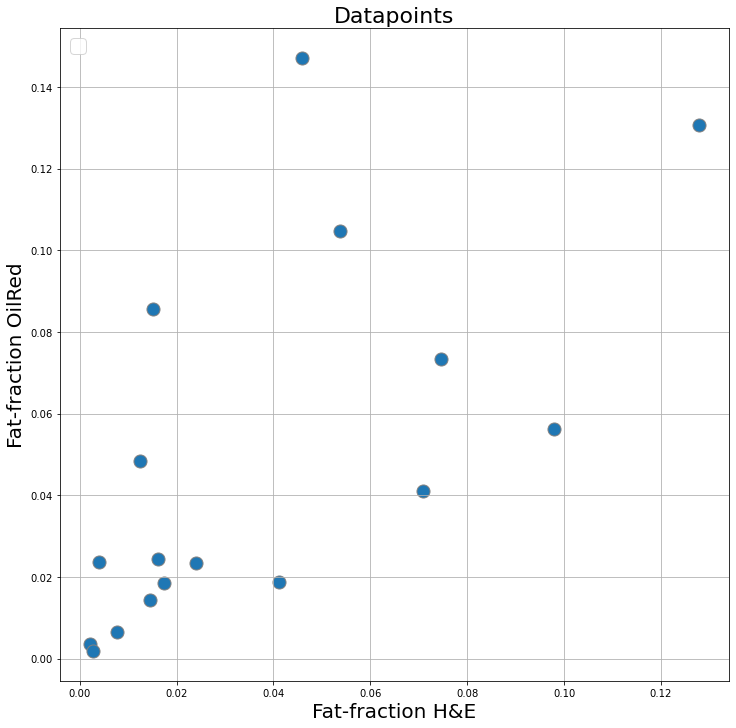

In [116]:
plt.figure(figsize=(12, 12))
plt.grid(True)
hue_order = [str(x) for x in np.arange(8)]
sns.scatterplot(data=df_fractions, x='fat_fraction_HE', y='fat_fraction_OilRed', s=170, edgecolor='gray', linewidth=1, palette=sns.color_palette("Set1", 8))

plt.legend(loc='upper left', prop={'size': 20})
#plt.xticks(myticks, fontsize=15); plt.yticks(myticks, fontsize=15)

plt.title('Datapoints', fontsize=22)
plt.xlabel("Fat-fraction H&E",fontsize=20)
plt.ylabel("Fat-fraction OilRed",fontsize=20)

plt.savefig('scatterplot.png', dpi=300)
plt.show()

## (5.7) Print the correlation of the manual annotations and OilRed color thresholding

In [117]:
corr_spearman = df_fractions[['fat_fraction_HE', 'fat_fraction_OilRed']].corr(method='spearman').iloc[0,1]
corr_pearson = df_fractions[['fat_fraction_HE', 'fat_fraction_OilRed']].corr(method='pearson').iloc[0,1]

print('corr_spearman:\t', corr_spearman)
print('corr_pearson:\t', corr_pearson)

corr_spearman:	 0.7132352941176471
corr_pearson:	 0.6353287530257706


## (5.8) Plot H&E-KW/DA manual annotations vs. OilRed

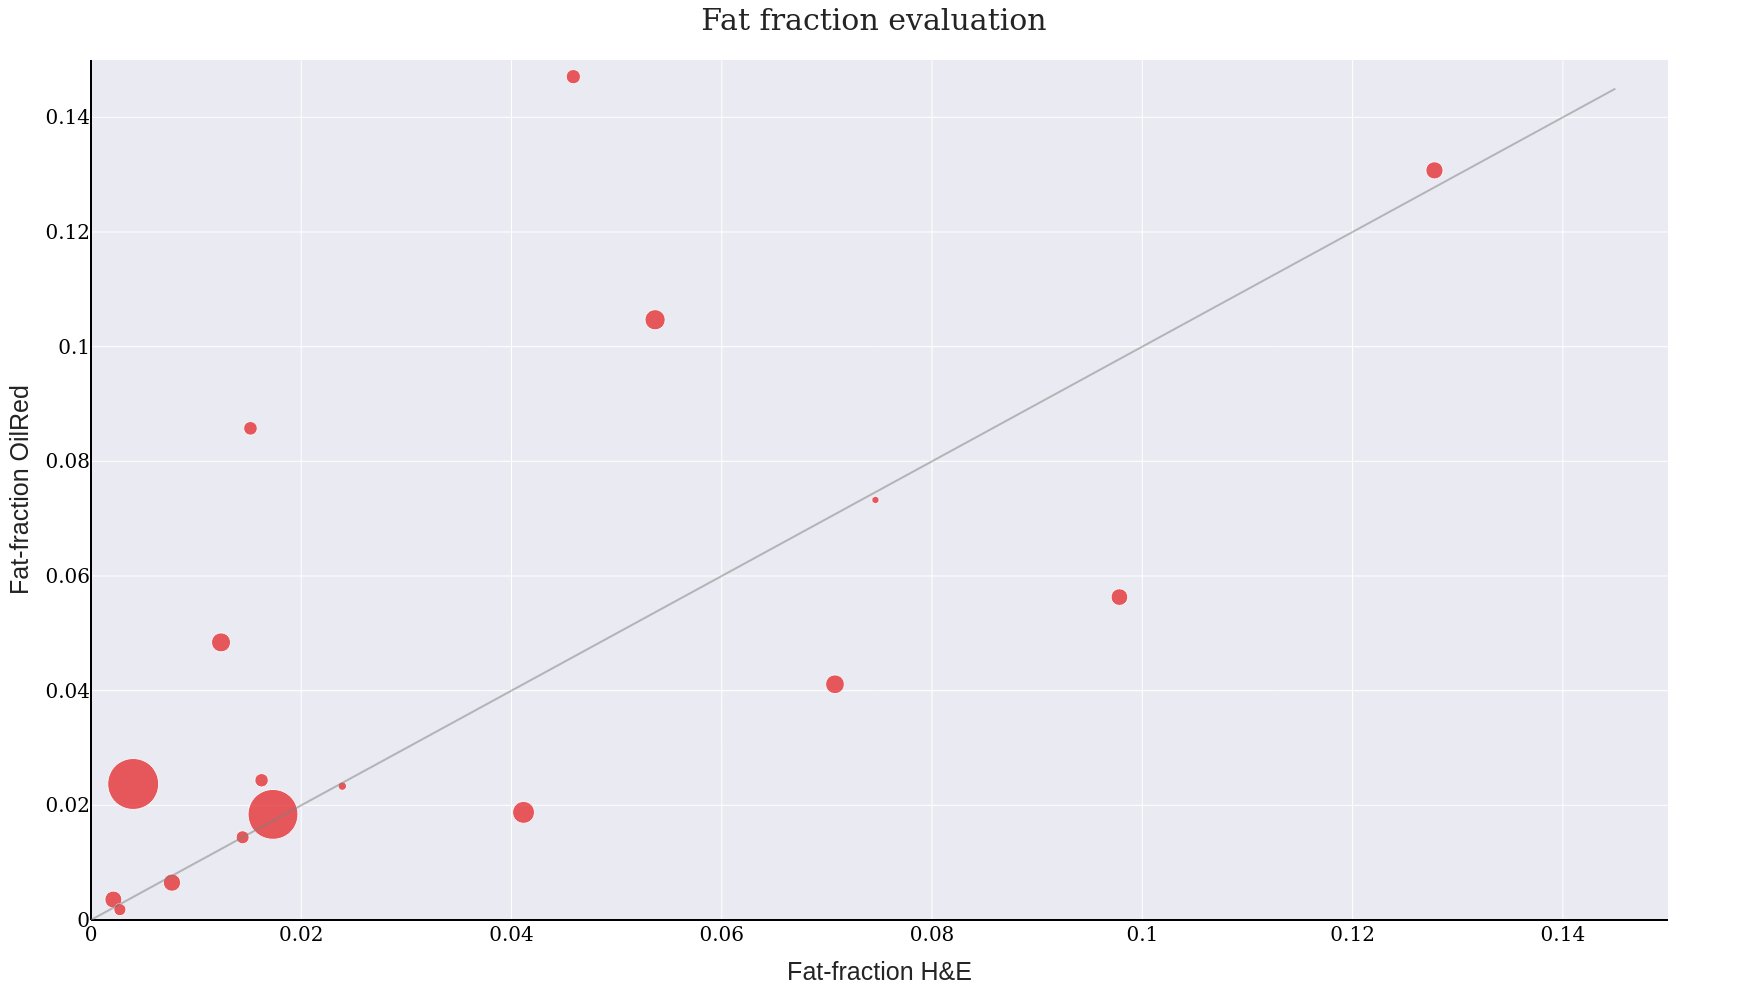

In [118]:
fig = px.scatter(df_fractions, x="fat_fraction_HE", y="fat_fraction_OilRed", size='area_HE', size_max=30, 
                 width=1100, height=1000, color_discrete_sequence=px.colors.qualitative.Set1, opacity=0.7, template="seaborn")

fig.add_trace(
    go.Scatter(
        x=[0, 0.145],
        y=[0, 0.145],
        mode="lines",
        line=go.scatter.Line(color="gray"),
        opacity=0.5,
        showlegend=False)
)

fig.update_traces(
    marker=dict(sizeref=6)
)

# title
fig.update_layout(
    title=dict(
        text="Fat fraction evaluation"        
    ),
    title_font_family="Candara",
    title_font_size=30
)

# x-axis
fig.update_xaxes(
    title="Fat-fraction H&E",
    title_font_size=25,
    showticklabels=True,
    rangemode="tozero",
    #tick0=0.02, 
    #dtick=0.01,
    range=[0, 0.15],
    tickfont=dict(
        family="Candara",
        size=20,
        color="Black"
    ),
    zerolinewidth=2, 
    zerolinecolor='black'
)

# y-axis
fig.update_yaxes(
    title="Fat-fraction OilRed",
    title_font_size=25,
    showticklabels=True,
    rangemode="tozero",
    #tick0=0.02, 
    #dtick=0.01,
    range=[0, 0.15],
    tickfont=dict(
        family="Candara",
        size=20,
        color="Black"
    ),
    zerolinewidth=2, 
    zerolinecolor='black'
)
    
# grid
fig.update_layout(
    grid=dict(xgap=0.1)
)

fig.show()

fig.write_html("fat-fraction.html", include_plotlyjs="cdn")
fig.write_image(file="fat-fraction.png", format="png")
fig.write_image(file="fat-fraction.svg", format="svg")

# (6) Perform a label-validation

In [6]:
validLabel_KW_2020_path = './data/prediction/SegNet_512_Kfold/ValidLabel_KW_2020.csv'
validLabel_KW_2021_path = './data/prediction/SegNet_512_Kfold/ValidLabel_KW_2021.csv'
validLabel_Model_prediction_path = './data/prediction/SegNet_512_Kfold/ValidLabel_Model_prediction.csv'

In [8]:
validLabel_KW_2020_df = pd.read_csv(validLabel_KW_2020_path, index_col=0)
validLabel_KW_2021_df = pd.read_csv(validLabel_KW_2021_path, index_col=0)
validLabel_Model_prediction_df = pd.read_csv(validLabel_Model_prediction_path, index_col=0)

validLabel_KW_2020_df

S46.3  S09.1  S34.3  S35.4  S51.1
region_id                                   
1              0      1      1      1      1
2              0      0      1      1      1
3              1      1      1      1      0
4              1      1      0      1      1
5              0      0      1      1      1
6              1      1      0      0      0

In [9]:
KW_2020 = validLabel_KW_2020_df.to_numpy().ravel()
KW_2021 = validLabel_KW_2021_df.to_numpy().ravel()
Model_prediction = validLabel_Model_prediction_df.to_numpy().ravel()

print(KW_2020)
print(KW_2021)
print(Model_prediction)

[0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 0 0 0]
[1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0]
[1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 1 1 1]


- create the confusion matrix for each comparison
- normalize along the x-axis to find out how many samples per class have received their "correct" label
- plot all three confusion matrices next to each other

In [28]:
conf_KW2020_vs_Model_prediction = sklearn.metrics.confusion_matrix(y_true=KW_2020, y_pred=Model_prediction)
conf_KW2021_vs_Model_prediction = sklearn.metrics.confusion_matrix(y_true=KW_2021, y_pred=Model_prediction)
conf_KW2020_vs_KW2021 = sklearn.metrics.confusion_matrix(y_true=KW_2020, y_pred=KW_2021)

print('KW2020_vs_Model_prediction:\n', conf_KW2020_vs_Model_prediction)
print('KW2021_vs_Model_prediction:\n', conf_KW2021_vs_Model_prediction)
print('KW2020_vs_KW2021:\n', conf_KW2020_vs_KW2021)

Kassandra2020_vs_Model_prediction:
 [[ 1  9]
 [ 8 12]]
Kassandra2021_vs_Model_prediction:
 [[ 2  5]
 [ 7 16]]
Kassandra2020_vs_Kassandra2021:
 [[ 6  4]
 [ 1 19]]


In [36]:
np.set_printoptions(precision=2)

conf_KW2020_vs_Model_prediction_norm = conf_KW2020_vs_Model_prediction.astype('float') / conf_KW2020_vs_Model_prediction.sum(axis=1)[:, np.newaxis]
conf_KW2021_vs_Model_prediction_norm = conf_KW2021_vs_Model_prediction.astype('float') / conf_KW2021_vs_Model_prediction.sum(axis=1)[:, np.newaxis]
conf_KW2020_vs_KW2021_norm = conf_KW2020_vs_KW2021.astype('float') / conf_KW2020_vs_KW2021.sum(axis=1)[:, np.newaxis]

print('KW2020_vs_Model_prediction-normed:\n', conf_KW2020_vs_Model_prediction_norm)
print('KW2021_vs_Model_prediction-normed:\n', conf_KW2021_vs_Model_prediction_norm)
print('KW2020_vs_KW2021-normed:\n', conf_KW2020_vs_KW2021_norm)

Kassandra2020_vs_Model_prediction-normed:
 [[0.1 0.9]
 [0.4 0.6]]
Kassandra2021_vs_Model_prediction-normed:
 [[0.29 0.71]
 [0.3  0.7 ]]
Kassandra2020_vs_Kassandra2021-normed:
 [[0.6  0.4 ]
 [0.05 0.95]]


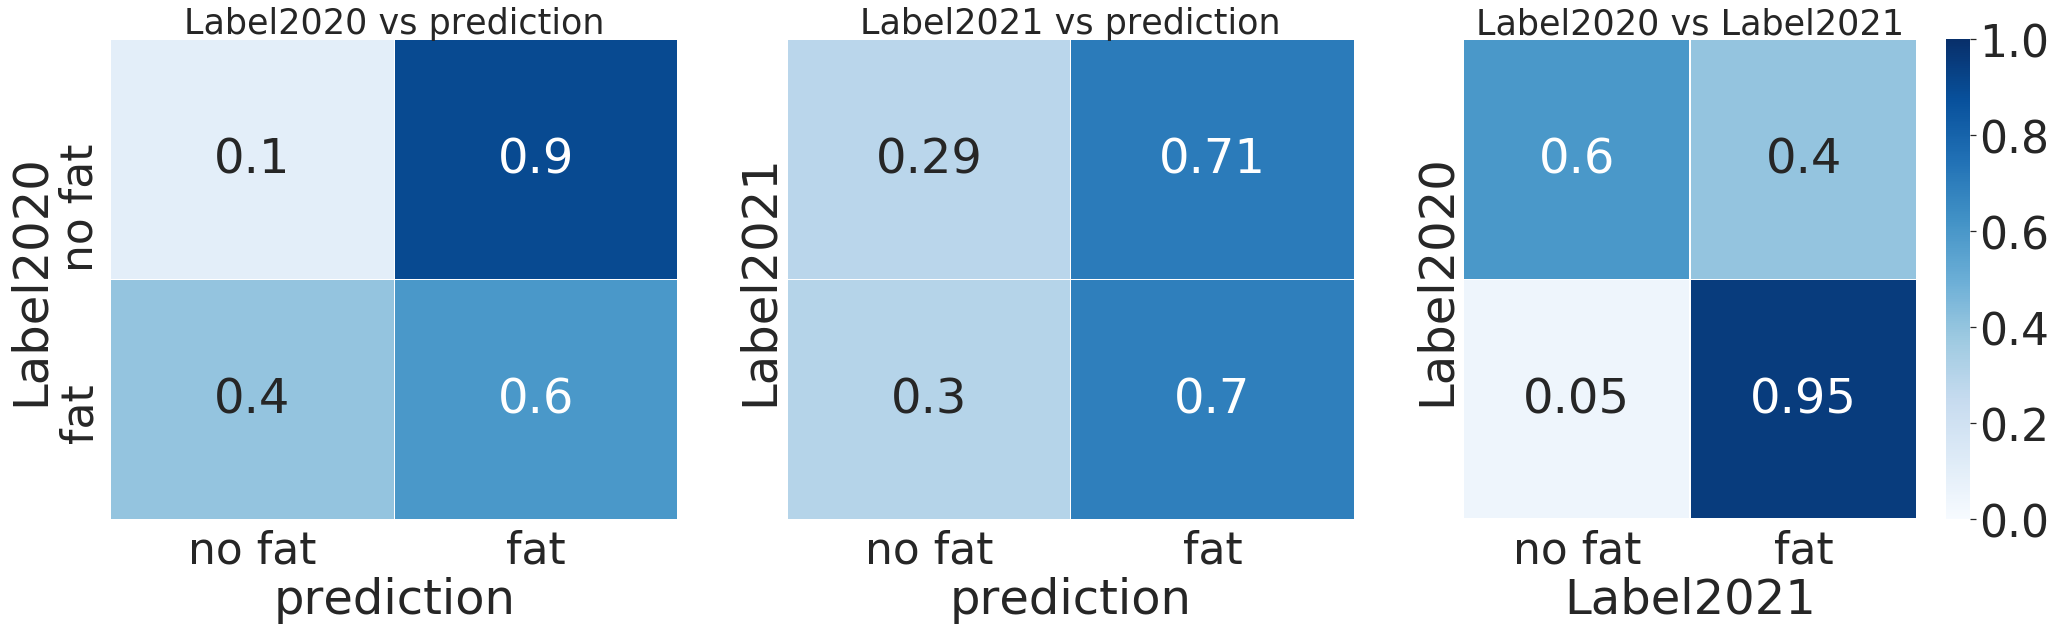

In [72]:
fig, ax_arr = plt.subplots(1, 3, sharey=True, figsize=(30, 10))
ax1, ax2, ax3  = ax_arr.ravel()

sns.set(font_scale=4)

ax1.set_title("Label2020 vs prediction", fontsize=35)
sns.heatmap(conf_KW2020_vs_Model_prediction_norm, xticklabels=['no fat', 'fat'], yticklabels=['no fat', 'fat'], 
            cmap=plt.cm.Blues, annot=True, vmin=0, vmax=1, linewidths=.5, ax=ax1, cbar=False)
ax1.set_ylabel('Label2020'); ax1.set_xlabel('prediction')

ax2.set_title("Label2021 vs prediction", fontsize=35)
sns.heatmap(conf_KW2021_vs_Model_prediction_norm, xticklabels=['no fat', 'fat'], yticklabels=['no fat', 'fat'], 
            cmap=plt.cm.Blues, annot=True, vmin=0, vmax=1, linewidths=.5, ax=ax2, cbar=False)
ax2.set_ylabel('Label2021'); ax2.set_xlabel('prediction')

ax3.set_title("Label2020 vs Label2021", fontsize=35)
sns.heatmap(conf_KW2020_vs_KW2021_norm, xticklabels=['no fat', 'fat'], yticklabels=['no fat', 'fat'], 
            cmap=plt.cm.Blues, annot=True, vmin=0, vmax=1, linewidths=.7, ax=ax3, cbar=True)
ax3.set_ylabel('Label2020'); ax3.set_xlabel('Label2021')

plt.tight_layout()
plt.savefig('conf_matrices_validateLabel.png', dpi=300)
plt.show()

In [ ]:
pd.reset_option('display.float_format')

In [57]:
paths = [ 
    "./data/quantification/metric-evaluation/KW-vs-cellpose/whole-samples/*.csv",
    "./data/quantification/metric-evaluation/KW-vs-ilastik/whole-samples/*.csv",
    "./data/quantification/metric-evaluation/KW-vs-LAB_kmeans_C=3/whole-samples/*.csv",
    "./data/quantification/metric-evaluation/KW-vs-LAB_kmeans_C=4/whole-samples/*.csv",
    "./data/quantification/metric-evaluation/KW-vs-SegNet_crossValidation/whole-samples/*.csv",
    "./data/quantification/metric-evaluation/KW-vs-SegNet_model-all/whole-samples/*.csv"
]

In [60]:
names = ["cellpose", "ilastik", "kmeans-3", "kmeans-4" , "SegNet-cross-validation", "SegNet-final"]

In [61]:
df_results = pd.DataFrame()

for name, path in zip(names, paths):
        
    df = pd.read_csv(glob(path)[0], index_col=0)
    df_results[name] = df.mean(axis=0).round(decimals=2).astype(object)
        
df_results.T

/home/jpraetor/anaconda3/envs/dltoolbox/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Accuracy Precision Recall   F-1 TruePositive  \
cellpose                    0.98      0.44   0.72  0.51   2452861.82   
ilastik                     0.98      0.42    0.4  0.37   1393433.94   
kmeans-3                    0.95      0.25   0.68  0.32    2182786.0   
kmeans-4                    0.95      0.25   0.65  0.32   2106727.88   
SegNet-cross-validation     0.99      0.61   0.63  0.61   2343534.53   
SegNet-final                0.99      0.68   0.87  0.75   3109759.82   

                        FalsePositive FalseNegative  TrueNegative  
cellpose                   1841528.94     969326.71  140659995.88  
ilastik                    1355855.94    2028754.59  141145668.88  
kmeans-3                   5448205.24    1239402.53  137053319.59  
kmeans-4                    5237013.0    1315460.65  137264511.82  
SegNet-cross-validation     738014.65     1078654.0  141763510.18  
SegNet-final                822029.41     312428.71  141679495.41

In [62]:
df_results = pd.DataFrame()

for name, path in zip(names, paths):
        
    df = pd.read_csv(glob(path)[0], index_col=0)
    df_results[name] = df.median(axis=0).round(decimals=2).astype(object)
    
df_results.T

/home/jpraetor/anaconda3/envs/dltoolbox/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Accuracy Precision Recall   F-1 TruePositive  \
cellpose                    0.98      0.44   0.71  0.51     921212.0   
ilastik                     0.98      0.37   0.33  0.35     498946.0   
kmeans-3                    0.96      0.22   0.71  0.35    1074889.0   
kmeans-4                    0.96      0.22   0.67  0.33    1013706.0   
SegNet-cross-validation     0.99      0.61   0.63  0.67     966626.0   
SegNet-final                0.99      0.73   0.87  0.77    1207802.0   

                        FalsePositive FalseNegative TrueNegative  
cellpose                    1494625.0      611198.0  129824902.0  
ilastik                      759542.0     1036907.0  130761639.0  
kmeans-3                    5320193.0      460964.0  125216906.0  
kmeans-4                    5251414.0      522147.0  125180495.0  
SegNet-cross-validation      699984.0      442022.0  130906554.0  
SegNet-final                 660204.0      246581.0  130502209.0

# Plot heatmaps for statistical tests

In [8]:
import seaborn as sns

sns.set(font_scale=2.5, font="Candara")

In [188]:
def get_tri_heatmap(df_, upper, save_directory, method):
    # https://seaborn.pydata.org/generated/seaborn.heatmap.html
    # see documentation: 
    # mask bool array or DataFrame, optional
    #      If passed, data will not be shown in cells where mask is True. Cells with missing values are automatically masked.
    
    if upper:
        tri_matrix = np.triu(df)
    else:
        tri_matrix = np.tril(df)
        df_ = df_.abs()
        
    mask = tri_matrix.astype(bool)        
    # Want diagonal elements as well
    mask[np.diag_indices_from(mask)] = False
        
    values = df_.to_numpy()[mask]
    values = values[~np.isnan(values)]   
       
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(13, 13))

    # Generate a custom diverging colormap
    if upper:
        cmap = sns.hls_palette(s=.3, as_cmap=True)
        
        annot_format = '.3g' #'.4f'
        min_value = 0
    else:
        cmap = sns.cubehelix_palette(as_cmap=True)
        annot_format = '.2f'
        min_value = values.min()
            
    # Draw the heatmap with the mask and correct aspect ratio
    sns_plot = sns.heatmap(
        df_, 
        mask=mask.T, 
        cmap=cmap, 
        vmin=min_value,
        vmax=values.max(), 
        center=0,
        square=True, 
        linewidths=.5, 
        annot = True,
        fmt=annot_format, 
        annot_kws={'size': 17},
        cbar_kws={"shrink": 0.8}
    )
    
    # rotate ticks
    sns_plot.set_xticklabels(sns_plot.get_xticklabels(), rotation=60)
           
    # save to file
    fig = sns_plot.get_figure()
    
    if upper:
        save_path = os.path.join(save_directory, f'{method}_p-value.png')
    else:
        save_path = os.path.join(save_directory, f'{method}_effect-size.png')
            
    print(save_path)
    fig.savefig(save_path, bbox_inches='tight')
    
    print(mask)
    print(values, min_value, values.max())
    
# get_tri_heatmap(df, upper=True, save_directory=save_directory, method=os.path.basename(file_path).split('_')[1])

In [ ]:
path = "./data/quantification/metric-evaluation/statistical_analysis/Pixel-wise-overlap*"

idx = 3
file_path = glob(path)[idx]
file_path

In [203]:
df = pd.read_csv(file_path, index_col=0)
df.columns = [x.replace(" ", "\n") for x in df.columns]
df.index = [x.replace(" ", "\n") for x in df.index]

names = df.columns
print(list(names))

df.values

['k-means', 'ilastik', 'cellpose', 'SegNet\ncross-validation', 'SegNet\nretrained']


array([[       nan,  8.507e-05,  2.140e-09,  1.646e-11,  3.642e-10],
       [-1.260e+00,        nan,  5.400e-01,  4.247e-05,  6.179e-05],
       [-2.900e+00, -1.500e-01,        nan,  7.633e-08,  1.093e-06],
       [-4.030e+00, -1.350e+00, -2.250e+00,        nan,  2.503e-02],
       [-3.280e+00, -1.300e+00, -1.840e+00, -6.000e-01,        nan]])

In [ ]:
save_directory = path[:-19]
save_directory

/asbdata/Philipp/SheepFat/quantification/metric-evaluation/statistical_analysis/Precision_p-value.png
[[False  True  True  True  True]
 [False False  True  True  True]
 [False False False  True  True]
 [False False False False  True]
 [False False False False False]]
[8.507e-05 2.140e-09 1.646e-11 3.642e-10 5.400e-01 4.247e-05 6.179e-05
 7.633e-08 1.093e-06 2.503e-02] 0 0.54


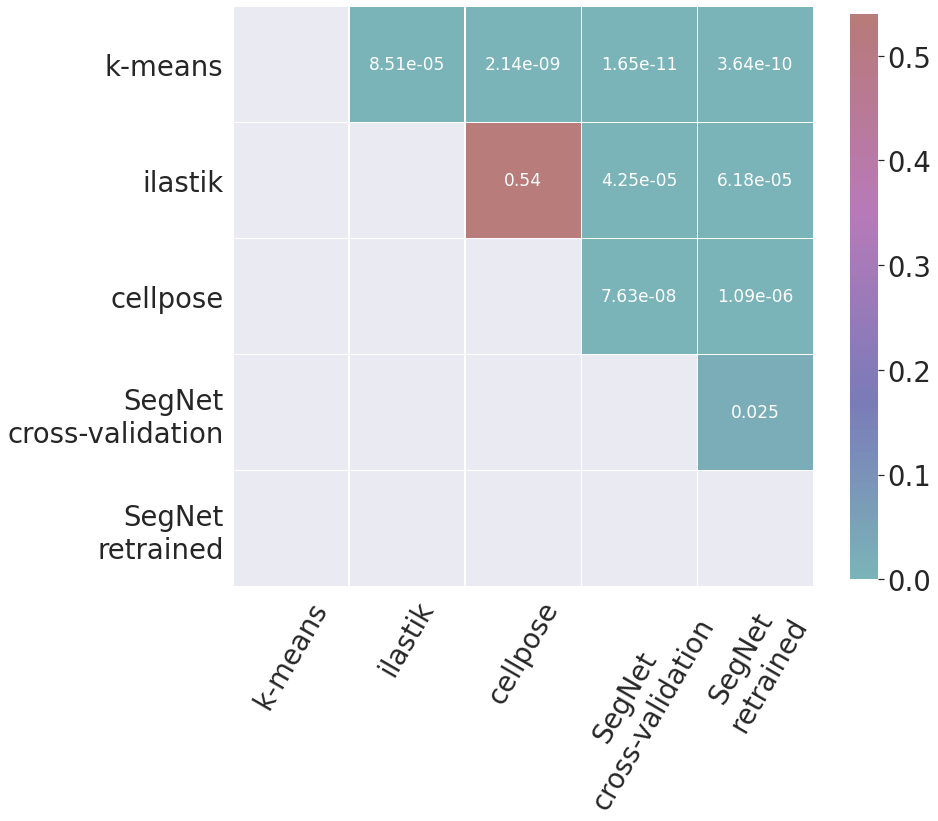

In [205]:
get_tri_heatmap(df, upper=True, save_directory=save_directory, method=os.path.basename(file_path).split('_')[1])